In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

file_path = "heart_attack_prediction_dataset.csv"

df = pd.read_csv(file_path)

df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Check the shape and columns, drop the duplicates

In [6]:
df.shape

(8763, 26)

In [7]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(8763, 26)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [10]:
columns_to_drop = ['Hemisphere', 'Patient ID', 'Continent']

df.drop(columns_to_drop, axis=1, inplace=True)

df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,261404,31.251233,286,0,6,Argentina,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,Canada,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,France,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,125640,36.464704,378,3,4,Canada,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,160555,21.809144,231,1,5,Thailand,0


1- Lets start organizing the age & income column

In [11]:
df['Age'].unique()

array([67, 21, 84, 66, 54, 90, 20, 43, 73, 71, 77, 60, 88, 69, 38, 50, 45,
       36, 48, 40, 79, 63, 27, 25, 86, 42, 52, 29, 30, 47, 44, 33, 51, 70,
       85, 31, 56, 24, 74, 72, 55, 26, 53, 46, 57, 22, 35, 39, 80, 65, 83,
       82, 28, 19, 75, 18, 34, 37, 89, 32, 49, 23, 59, 62, 64, 61, 76, 41,
       87, 81, 58, 78, 68])

In [12]:
df['Age'].isnull().sum()

0

In [13]:
df['Income'].unique()

array([261404, 285768, 235282, ...,  36998, 209943, 247338])

In [14]:
df['Income'].isnull().sum()

0

Above we can see that all data of 'Age' column is clear, no null, and all of them are in the type of integer

In [15]:
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,261404,31.251233,286,0,6,Argentina,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,Canada,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,France,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,125640,36.464704,378,3,4,Canada,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,160555,21.809144,231,1,5,Thailand,0


2- Organizing the 'Sex' column

In [16]:
df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.rename(columns={'Sex_Male': 'is_male'},inplace=True)

# Drop first drops the original 'Sex' column. Now it is True if patient is Male otherwise it is False.

df['is_male'] = df['is_male'].astype(int)

# changing type to integer True -> 1 , False -> 0 so it won't be any problem when we use this column in model.

df.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,is_male
0,67,208,158/88,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,Argentina,0,1
1,21,389,165/93,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,Canada,0,1
2,21,324,174/99,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,France,0,0
3,84,383,163/100,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,Canada,0,1
4,66,318,91/88,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,Thailand,0,1


3- Orginizing the Cholesterol Column

In [18]:
df['Cholesterol'].unique()

array([208, 389, 324, 383, 318, 297, 358, 220, 145, 248, 373, 374, 228,
       259, 122, 379, 166, 303, 340, 294, 359, 202, 133, 159, 271, 273,
       328, 154, 135, 197, 321, 375, 360, 263, 201, 347, 129, 229, 251,
       121, 190, 185, 279, 336, 192, 180, 203, 368, 222, 243, 218, 120,
       285, 377, 369, 311, 139, 266, 153, 339, 329, 333, 398, 124, 183,
       163, 362, 390, 200, 396, 255, 209, 247, 250, 227, 246, 223, 330,
       195, 194, 178, 155, 240, 237, 216, 276, 224, 326, 198, 301, 314,
       304, 334, 213, 254, 230, 316, 277, 388, 206, 384, 205, 261, 308,
       338, 382, 291, 168, 171, 378, 253, 245, 226, 281, 123, 173, 231,
       234, 268, 306, 186, 293, 161, 380, 239, 149, 320, 219, 335, 265,
       126, 307, 270, 225, 193, 148, 296, 136, 364, 353, 252, 232, 387,
       299, 357, 214, 370, 345, 351, 344, 152, 150, 131, 272, 302, 337,
       170, 356, 274, 188, 125, 138, 376, 181, 184, 275, 394, 128, 217,
       399, 283, 289, 284, 327, 262, 212, 350, 385, 162, 141, 36

In [19]:
df['Cholesterol'].isnull().sum()

0

Looks like 'Cholesterol' column is already organized, and we don't need to change anything

4- Blood Pressure

In [20]:
df['Blood Pressure'].unique()

array(['158/88', '165/93', '174/99', ..., '137/94', '94/76', '119/67'],
      dtype=object)

In [21]:
df['Blood Pressure'].isnull().sum()

0

We can see that there are not any NULL values for the Blood Pressure. However, it is in number/number format which we cannot use in our modelling. We can separate the columns. Originally: (systolic/diastolic) , now I will create separately two columns systolic_pressure and diastolic_pressure

In [22]:
def handle_blood_pressure_systolic(value):
    value = str(value)
    value = value.split('/')
    return int(value[0])

def handle_blood_pressure_diastolic(value):
    value = str(value)
    value = value.split('/')
    return int(value[1])


df['systolic_pressure'] = df['Blood Pressure'].apply(handle_blood_pressure_systolic)
df['diastolic_pressure'] = df['Blood Pressure'].apply(handle_blood_pressure_diastolic)

df.drop(columns='Blood Pressure', axis=1, inplace=True)

df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,Average,...,261404,31.251233,286,0,6,Argentina,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,285768,27.194973,235,1,7,Canada,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,235282,28.176571,587,4,4,France,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,Average,...,125640,36.464704,378,3,4,Canada,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,160555,21.809144,231,1,5,Thailand,0,1,91,88


So far we have completed:

Age

Sex

Cholesterol

Blood Pressure

5- Organizing the Heart Rate Column

In [23]:
df['Heart Rate'].unique()

array([ 72,  98,  73,  93,  48,  84, 107,  68,  55,  97,  70,  85, 102,
        40,  56, 104,  71,  69,  66,  81,  52, 105,  96,  74,  49,  45,
        50,  46,  44, 106,  83,  86,  65, 101,  51,  43,  79,  90,  94,
        78,  92,  54, 109,  61,  64,  82, 110,  42,  63,  41, 100,  76,
        75,  58,  53,  60,  77,  47,  59,  57,  87,  67,  88,  99,  80,
        95, 108,  89,  62, 103,  91])

In [24]:
df['Heart Rate'].isnull().sum()

0

In [25]:
df['Heart Rate'].isna().sum()

0

Looks like Heart Rate is already organized and cleaned. All values are in integer format, and the column does not contain any NaN value


In [26]:
df.head()


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,Average,...,261404,31.251233,286,0,6,Argentina,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,285768,27.194973,235,1,7,Canada,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,235282,28.176571,587,4,4,France,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,Average,...,125640,36.464704,378,3,4,Canada,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,160555,21.809144,231,1,5,Thailand,0,1,91,88


6- Organizing the 'Diabetes' Feature

In [27]:
df['Diabetes'].unique()

array([0, 1])

In [28]:
df['Diabetes'].isnull().sum()

0

In [29]:
df['Diabetes'].isna().sum()

0

Diabetes column is already organized.

In [30]:
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,Average,...,261404,31.251233,286,0,6,Argentina,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,285768,27.194973,235,1,7,Canada,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,235282,28.176571,587,4,4,France,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,Average,...,125640,36.464704,378,3,4,Canada,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,160555,21.809144,231,1,5,Thailand,0,1,91,88


7- Family History

In [31]:
df['Family History'].unique()

array([0, 1])

In [32]:
df['Family History'].isnull().sum()

0

In [33]:
df['Family History'].isna().sum()

0

Family history is already a clean feature

8- Smoking

In [34]:
df['Smoking'].unique()

array([1, 0])

In [35]:
df['Smoking'].isnull().sum()

0

In [36]:
df['Smoking'].isna().sum()

0

Smoking is already a clean feature

9- Obesity

In [37]:
df['Obesity'].unique()

array([0, 1])

In [38]:
df['Obesity'].isnull().sum()

0

In [39]:
df['Obesity'].isna().sum()

0

Obesity is already a clean feature

10- Alcohol Consumption

In [40]:
df['Alcohol Consumption'].unique()

array([0, 1])

In [41]:
df['Alcohol Consumption'].isnull().sum()

0

In [42]:
df['Alcohol Consumption'].isna().sum()

0

Alcohol consumption is already a clean feature, no null values are found and in integer type.

In [43]:
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,Average,...,261404,31.251233,286,0,6,Argentina,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,285768,27.194973,235,1,7,Canada,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,235282,28.176571,587,4,4,France,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,Average,...,125640,36.464704,378,3,4,Canada,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,160555,21.809144,231,1,5,Thailand,0,1,91,88


11- Exercise Hours Per Week

In [44]:
df['Exercise Hours Per Week'].unique()

array([ 4.16818884,  1.81324162,  2.07835299, ...,  3.14843791,
        3.78994983, 18.08174797])

In [45]:
df['Exercise Hours Per Week'].isnull().sum()

0

In [46]:
df['Exercise Hours Per Week'].isna().sum()

0

Exercise Hours Per Week column is also clean

12- Diet Column

In [47]:
df['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

With the changes below, now Unhealthy is represented as 0, Average is represented as 1 and Healthy is represented as 2

In [48]:
def handle_diet(value):
    value = str(value)

    if value == 'Unhealthy':
        return 0
    elif value == 'Average':
        return 1
    elif value == 'Healthy':
        return 2
    else:
        return np.nan



df['Diet'] = df['Diet'].apply(handle_diet)
df['Diet']

0       1
1       0
2       2
3       1
4       0
       ..
8758    2
8759    2
8760    1
8761    0
8762    2
Name: Diet, Length: 8763, dtype: int64

The type of the Diet is now integer instead of Object.

In [49]:
df['Diet'].unique()

array([1, 0, 2])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Diet                             8763 non-null   int64  
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

13- Previous Heart Problems

In [51]:
df['Previous Heart Problems'].unique()

array([0, 1])

In [52]:
df['Previous Heart Problems'].isnull().sum()

0

In [53]:
df['Previous Heart Problems'].isna().sum()

0

Previous heart problems column is already cleaned, no null values and all values are in integer format

14- Medication Use

In [54]:
df['Medication Use'].unique()

array([0, 1])

In [55]:
df['Medication Use'].isnull().sum()

0

In [56]:
df['Medication Use'].isna().sum()

0

Medication Use column is already cleaned, no null values and all values are in integer format

15- Stress Level

In [57]:
df['Stress Level'].unique()

array([ 9,  1,  6,  2,  7,  4,  5,  8, 10,  3])

In [58]:
df['Stress Level'].isnull().sum()

0

Stress Level Column is already cleaned, no null values and all values are in integer format.

16- Sedentary Hours Per Day (Hours that are spent without moving)

In [59]:
df['Sedentary Hours Per Day'].unique()

array([6.61500145, 4.96345884, 9.46342584, ..., 2.37521373, 0.02910426,
       9.00523438])

In [60]:
df['Sedentary Hours Per Day'].isnull().sum()

0

In [61]:
df['Sedentary Hours Per Day'].isna().sum()

0

Sedentary Hours Per Day column is already cleaned, no null values and all values are in float format

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Diet                             8763 non-null   int64  
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

17- Cleaning BMI Feature

In [62]:
df['BMI'].unique()

array([31.25123273, 27.19497335, 28.17657068, ..., 35.40614616,
       27.29402009, 32.91415086])

In [64]:
df['BMI'].isnull().sum()

0

In [65]:
df['BMI'].isna().sum()

0

BMI feature is already cleaned

18- Triglycerides

In [66]:
df['Triglycerides'].unique()

array([286, 235, 587, 378, 231, 795, 284, 370, 790, 232, 469, 523, 590,
       506, 635, 773,  68, 402, 517, 247, 747, 360, 358, 526, 605, 667,
       316, 551, 482, 718, 297, 661, 558, 209, 586, 743, 411, 785, 697,
       519, 595, 452, 158, 679, 675, 792, 584, 366, 741, 474,  92, 410,
       398, 493, 614, 682, 106, 216, 408, 628, 481,  67,  82, 305, 164,
       211, 511, 766, 547, 327, 367, 681, 131,  42, 692, 664, 543, 689,
       569, 458, 683, 779, 136, 643, 653,  55, 275, 314, 760, 404, 576,
       690, 648, 385, 255, 468, 784, 509, 205, 109, 530, 654, 331, 485,
       250, 113, 377, 180, 229, 602, 285, 471, 554, 344, 416, 445, 709,
       426, 528, 388, 441, 306, 749, 347, 341, 451, 356, 336, 455, 223,
       262, 239, 555, 363, 489, 788, 121, 553, 617, 174, 167, 563, 665,
        65, 657, 237, 141, 767, 292, 214, 221, 447, 634, 460, 711,  97,
       267, 695, 717, 383, 332, 449, 701, 524, 549,  31, 276, 744, 128,
        52, 394,  54, 739, 407, 751, 436, 473, 218, 129, 579, 49

In [67]:
Triglycerides = df['Triglycerides'].value_counts(ascending=False)
Triglycerides

799    25
507    22
121    22
593    22
469    22
       ..
120     3
213     3
185     3
295     3
130     2
Name: Triglycerides, Length: 771, dtype: int64

In [68]:
df['Triglycerides'].isnull().sum()

0

In [69]:
df['Triglycerides'].isna().sum()

0

19- Physical Activity Days Per Week feature

In [70]:
df['Physical Activity Days Per Week'].unique()

array([0, 1, 4, 3, 5, 6, 7, 2])

In [71]:
df['Physical Activity Days Per Week'].isnull().sum()

0

In [72]:
df['Physical Activity Days Per Week'].isna().sum()

0

20- Sleep Hours Per Day feature

In [73]:
df['Sleep Hours Per Day'].unique()

array([ 6,  7,  4,  5, 10,  8,  9])

In [74]:
df['Sleep Hours Per Day'].isnull().sum()

0

In [75]:
df['Sleep Hours Per Day'].isna().sum()

0

21- Organizing the "Country" column

In [76]:
df['Country'].unique()

array(['Argentina', 'Canada', 'France', 'Thailand', 'Germany', 'Japan',
       'Brazil', 'South Africa', 'United States', 'Vietnam', 'China',
       'Italy', 'Spain', 'India', 'Nigeria', 'New Zealand', 'South Korea',
       'Australia', 'Colombia', 'United Kingdom'], dtype=object)

In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

All features are cleaned, now let's head to the visualization part.

**Data Visualization**

Below you can see that the actual values for patients that can have a Heart Attack (Risky), and patients who are not likely to have a heart attack.

<Axes: ylabel='Heart Attack Risk'>

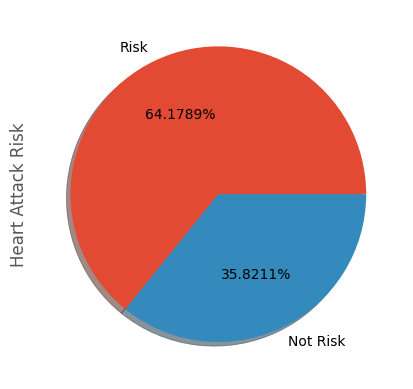

In [79]:
plt.style.use('ggplot')

df['Heart Attack Risk'].value_counts().plot.pie(autopct="%1.4f%%",labels=["Risk","Not Risk"], shadow=True,textprops={'color': 'black'})

In [81]:
df['Heart Attack Risk'].value_counts()

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

In [80]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,1.007874,...,158263.181901,28.891446,417.677051,3.489672,7.023508,9.382175,0.358211,0.697364,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.817134,...,80575.190806,6.319181,223.748137,2.282687,1.988473,5.788964,0.479502,0.459425,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,88310.000000,23.422985,225.500000,2.000000,5.000000,4.000000,0.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,1.000000,...,157866.000000,28.768999,417.000000,3.000000,7.000000,9.000000,0.000000,1.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,2.000000,...,227749.000000,34.324594,612.000000,5.000000,9.000000,14.000000,1.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,...,299954.000000,39.997211,800.000000,7.000000,10.000000,19.000000,1.000000,1.000000,180.000000,110.000000


Above we can see that our Data is not balanced, it is %64 percent to %35 percent. Therefore, we should make the data balanced. In the mean section for Heart Attack Risk, the value is 0.358211. It should be closer to 0.5 so that we can achieve the balanced data.

In [82]:
heart_attack_risk_sorted = df['Heart Attack Risk'].value_counts().sort_index()

print(heart_attack_risk_sorted)

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64


Now let's check the values for the columns with CatPlot

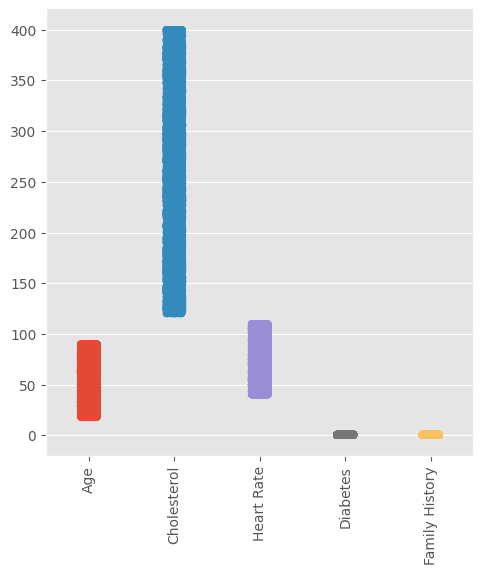

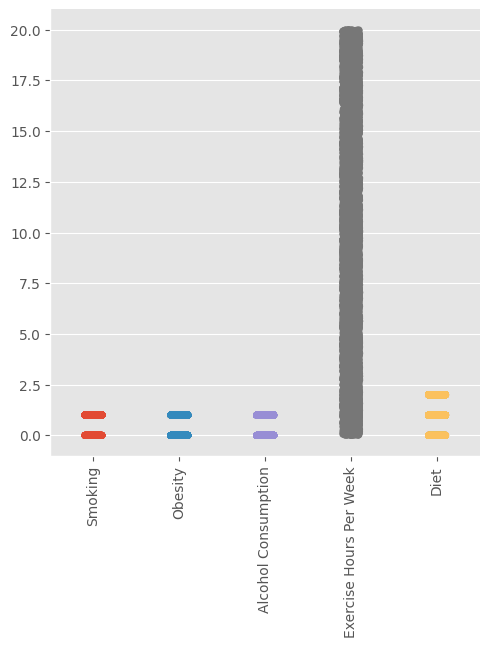

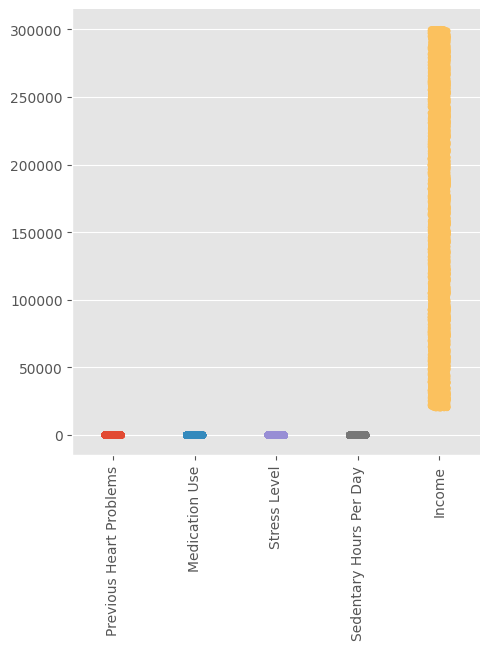

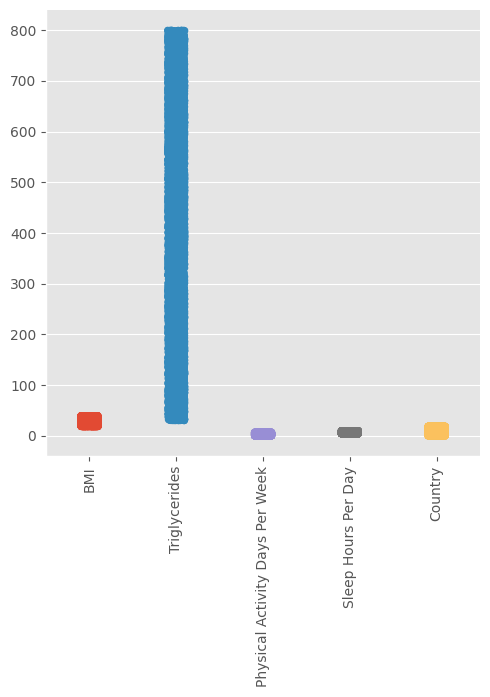

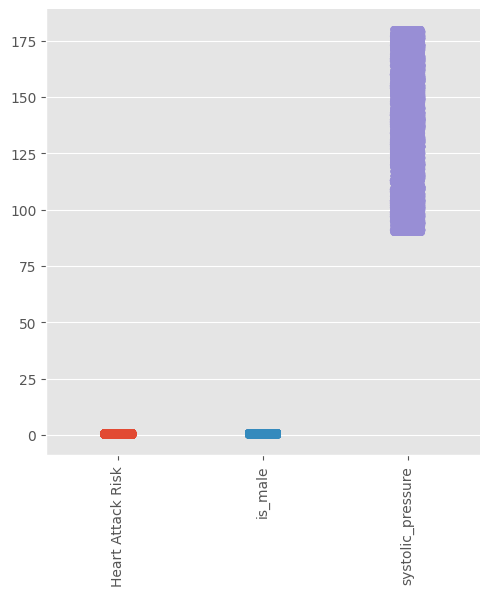

In [83]:
plots = []

plots.append(sns.catplot(data=df.iloc[:, 0:5]))
plots.append(sns.catplot(data=df.iloc[:, 5:10]))
plots.append(sns.catplot(data=df.iloc[:, 10:15]))
plots.append(sns.catplot(data=df.iloc[:, 15:20]))
plots.append(sns.catplot(data=df.iloc[:, 20:23]))


for i in range(5):
    plots[i].set_xticklabels(rotation=90)

**Inference from the CatPlot**

Above you can see the distribution of the values for each feature. For example, Previous Heart Attack Problems(1/0), Medication Use(1/0) are discrete values meaning that they represent a binary value (Yes/No). However, systolic_pressure and diastolic_pressure hold values such as 127, 128,235 etc.
In addition to the values, we can observe that our data doesn't contain any outlier values. So we don't have to worry about them.


**Heatmap**

We have scaled the Heatmap between -0.020 and 0.020 so that we could observe the changes.

<Axes: >

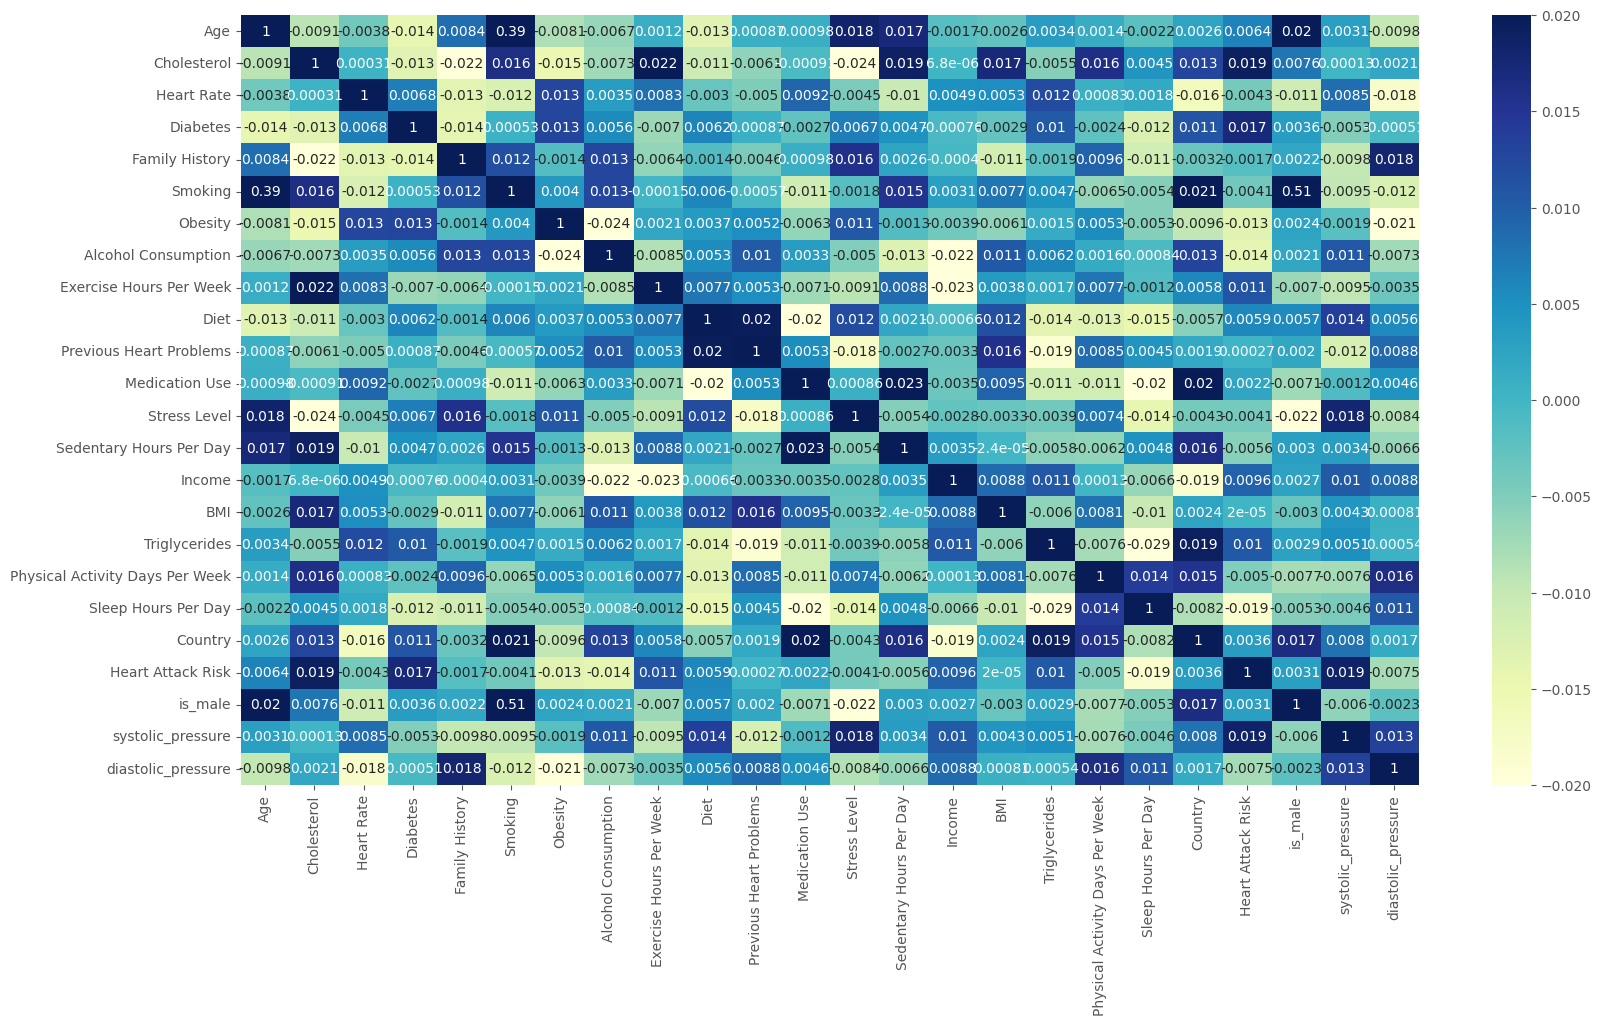

In [84]:
#HeatMap
plt.figure(figsize = (19,10))
corelation=df.corr()
sns.heatmap(corelation, cmap="YlGnBu",annot=True,vmin=-0.0200, vmax=0.0200)

From this Heatmap, we can understand that, Cholesterol, Diabetes, Exercise Hours Per Week, Triglycerides, and systolic_pressure (blood pressure) is more related with Heart Attack Risk than other features. BMI and Previous Heart Problems have low correlation with Heart Attack Risk. Therefore, we can drop them.

In [85]:
columns_to_drop = ['BMI','Previous Heart Problems']

df.drop(columns_to_drop, axis=1, inplace=True)

**Counts of features.**

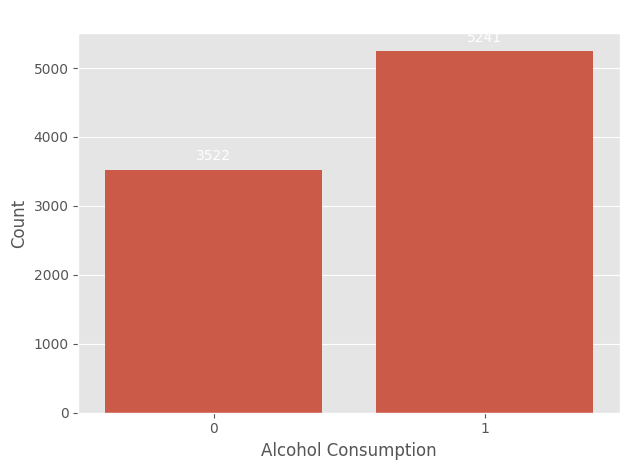

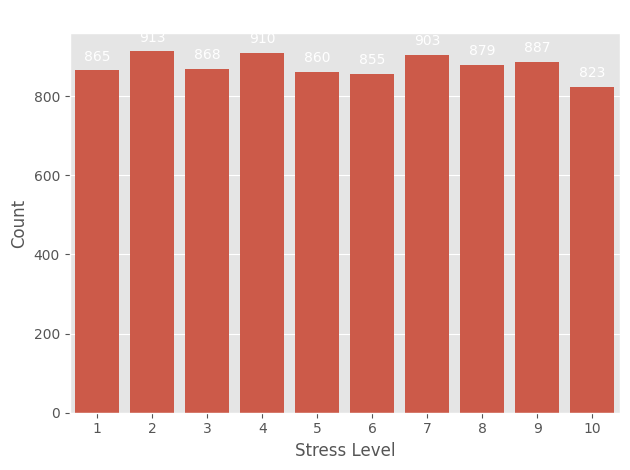

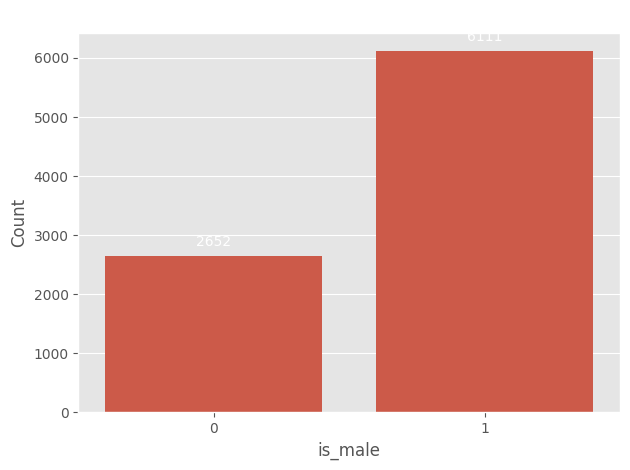

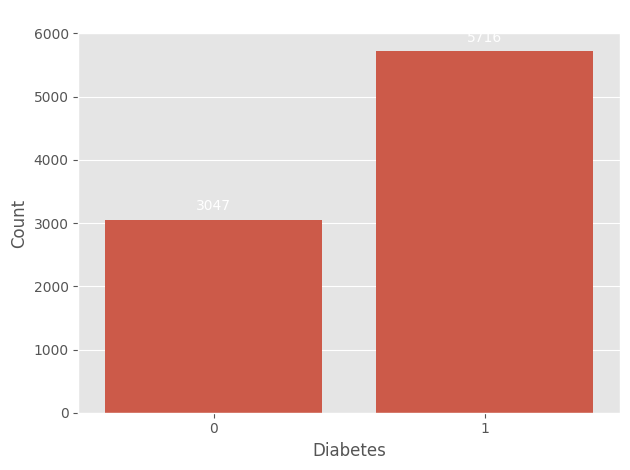

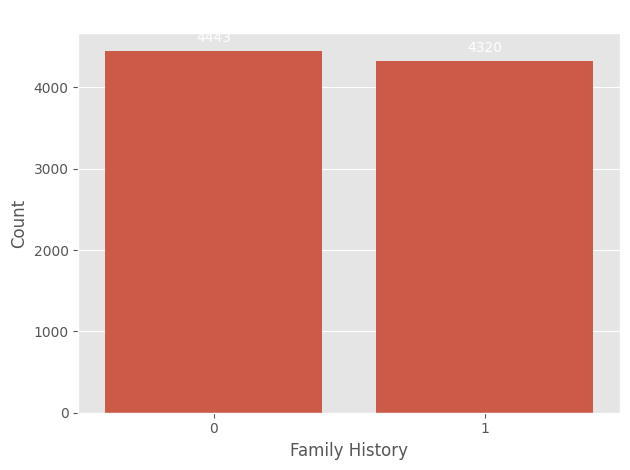

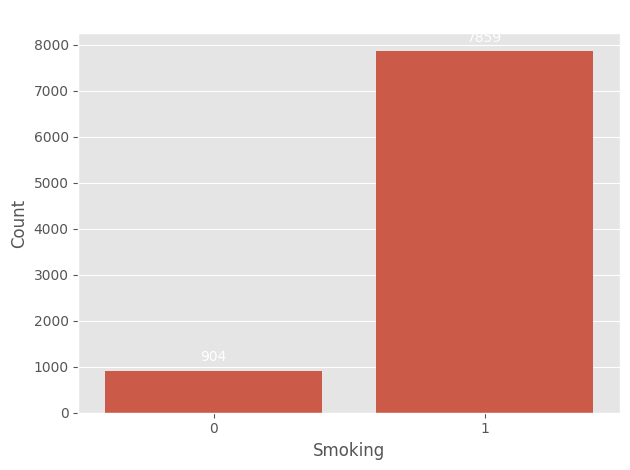

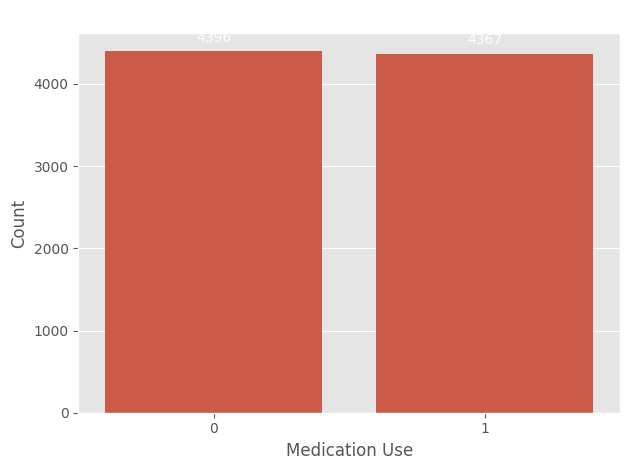

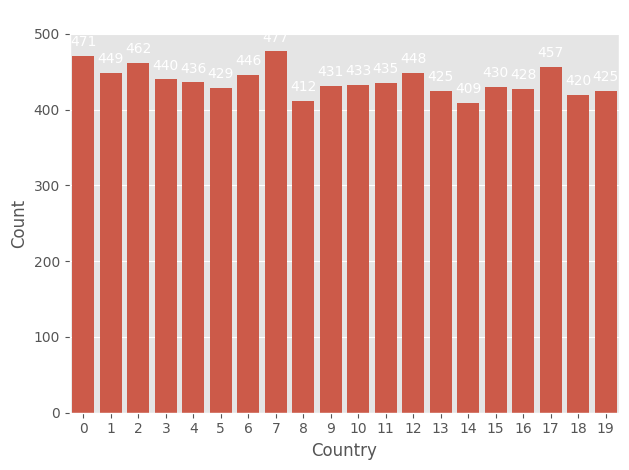

In [86]:
plt.style.use('ggplot')


plots_to_show = df[['Alcohol Consumption', 'Stress Level', 'is_male','Diabetes','Family History','Smoking','Medication Use', 'Country']]

for i in plots_to_show.columns:
    ctg_num = plots_to_show[i].value_counts()
    chart = sns.barplot(x=ctg_num.index, y=ctg_num)

    for p in chart.patches:
        chart.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points',
                       fontsize=10)

    plt.style.use('ggplot')
    plt.title(f'Counts of {i}')  # Set title for each plot
    plt.xlabel(i)  # Set x-axis label based on the column name
    plt.ylabel('Count')
    plt.tight_layout()  # Adjust layout to prevent overlapping

    plt.show()

In [87]:
df.shape

(8763, 22)

# **Balancing The Imbalance Data**

Above it can be seen that Heart Attack Risk has a median of 0.358211 meaning that data is imbalanced and distributed as %64 to %36 percent. To fix this issue, we can use several methods. For our case we will be using Random Over sampling.

In [88]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

random_over_sampler = RandomOverSampler(sampling_strategy=1)

y = df['Heart Attack Risk']
X = df.drop(['Heart Attack Risk'],axis=1)

X , y = random_over_sampler.fit_resample(X,y)

scaler = MinMaxScaler()
X_min_max = pd.DataFrame(scaler.fit_transform(X))


print(pd.DataFrame(y).describe())

       Heart Attack Risk
count       11248.000000
mean            0.500000
std             0.500022
min             0.000000
25%             0.000000
50%             0.500000
75%             1.000000
max             1.000000


In [89]:
balanced_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

balanced_df.to_csv('heart_attack_prediction_dataset_after_cleaning.csv', index=False)

<Axes: ylabel='Heart Attack Risk'>

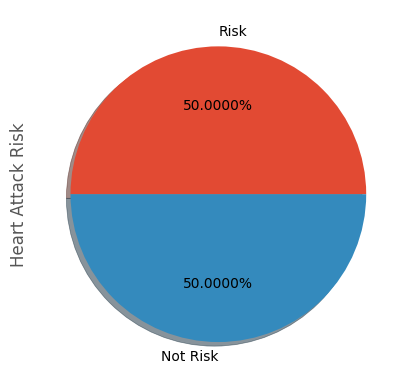

In [90]:
balanced_df['Heart Attack Risk'].value_counts().plot.pie(autopct="%1.4f%%",labels=["Risk","Not Risk"], shadow=True,textprops={'color': 'black'})

In [91]:
balanced_df['Heart Attack Risk'].value_counts()

0    5624
1    5624
Name: Heart Attack Risk, dtype: int64

Above you can see that now our data is balanced, and we used Over Sampling for that. Since we've used over sampling, Risky was 3139, now it is the same with not Risky which is 5624. The reason why we've used over sampling is that our data was not big enough for under sampling and it gave low accuracy when using it.

In [92]:
balanced_df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,is_male,systolic_pressure,diastolic_pressure,Heart Attack Risk
count,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,...,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000
mean,53.754356,260.045608,75.004090,0.655939,0.490220,0.895181,0.497866,0.592994,10.046764,1.012002,...,5.981409,158033.398915,417.933944,3.516803,7.010935,9.363709,0.697280,135.254712,85.123133,0.500000
std,21.196495,80.518159,20.582242,0.475082,0.499927,0.306333,0.500018,0.491298,5.803649,0.818203,...,3.465351,80523.300020,224.299079,2.299424,1.978673,5.823071,0.459456,26.399381,14.652376,0.500022
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,0.001263,20062.000000,30.000000,0.000000,4.000000,0.000000,0.000000,90.000000,60.000000,0.000000
25%,35.000000,192.750000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.028762,0.000000,...,2.999793,87929.750000,222.750000,2.000000,5.000000,4.000000,0.000000,112.000000,72.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.161285,1.000000,...,5.915035,157287.000000,418.000000,3.000000,7.000000,9.000000,1.000000,135.000000,85.000000,0.500000
75%,72.000000,329.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.107035,2.000000,...,8.990408,227548.000000,614.000000,6.000000,9.000000,14.000000,1.000000,158.000000,98.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,...,11.999313,299954.000000,800.000000,7.000000,10.000000,19.000000,1.000000,180.000000,110.000000,1.000000


<Axes: >

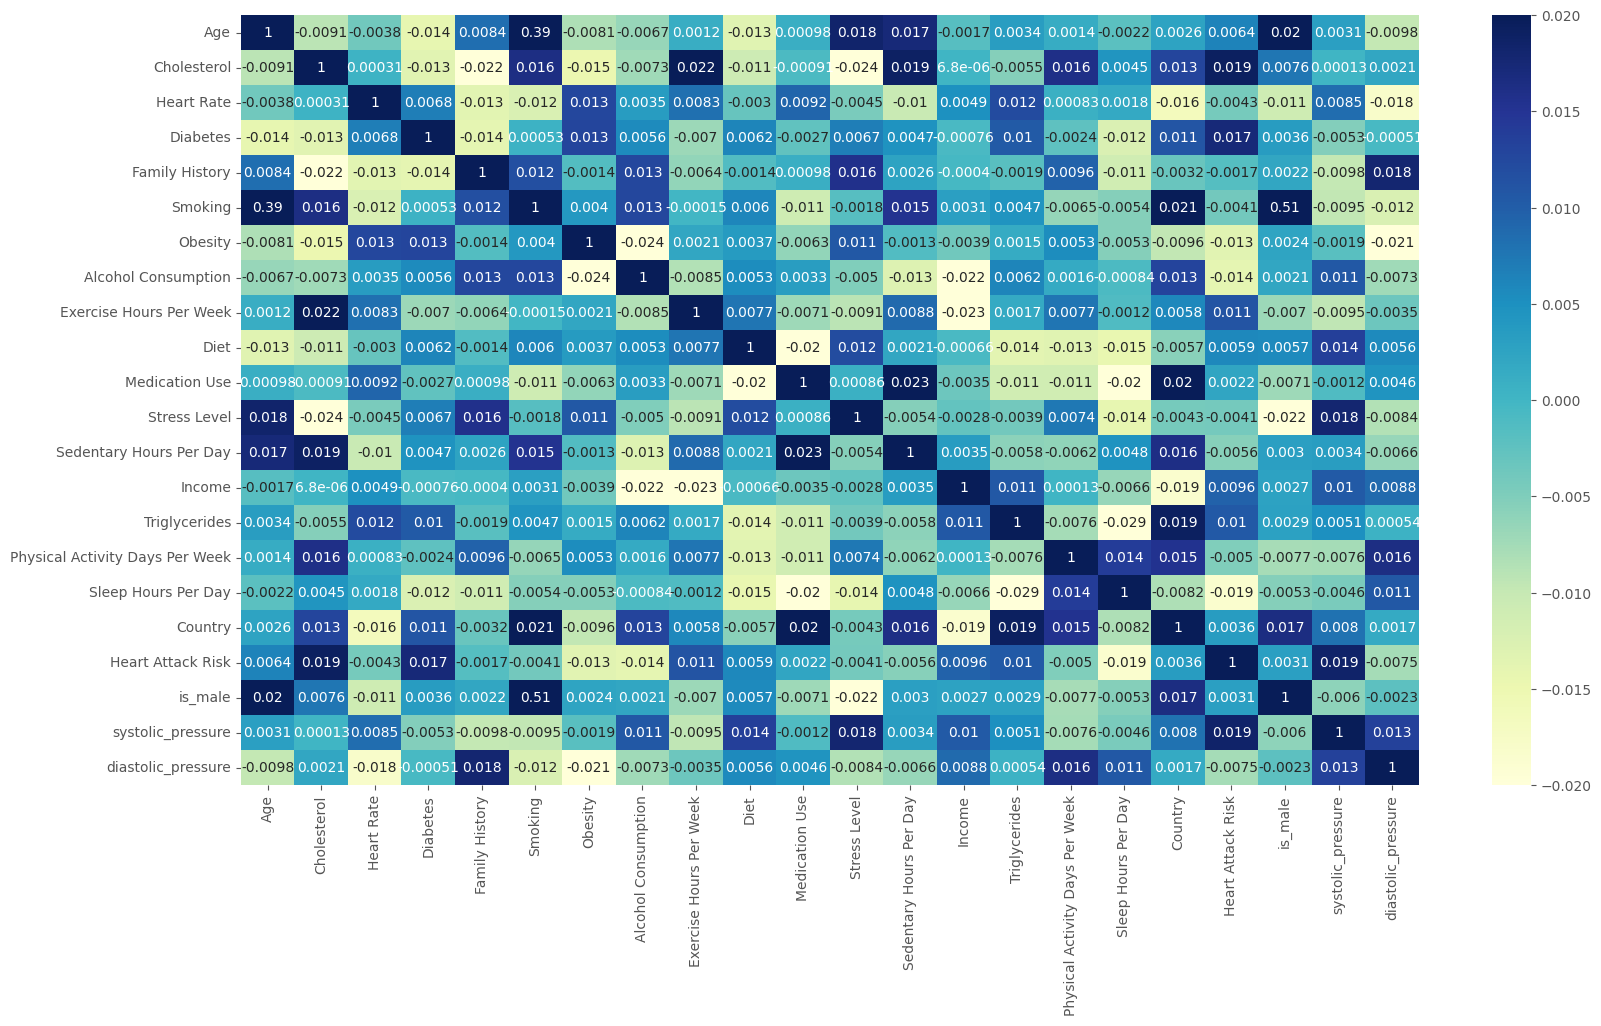

In [93]:
#HeatMap
plt.figure(figsize = (19,10))
corelation=df.corr()
sns.heatmap(corelation, cmap="YlGnBu",annot=True,vmin=-0.0200, vmax=0.0200)

Feature Selection & Score Calculation

For the feature selection there are few methods. Below you can find the list of methods for feature selection.

**Filter Methods**

*   Chi-Squared Test
*   SelectKBest
*   Mutual Information Classification


**Wrapper Methods**

*   RFE (Recursive Feature Elimination)
*   Forward Selection
*   Backward Elimination


**Embedded Methods**

*   LASSO Regression
* Tree Based Methods

* RandomForestClassifier

* DecisionTreeClassifier

* Gradient Boost

* Principal Component Analysis (PCA)

1- Chi-Squared Test , Mutual Info Classification

Since our data is balanced we will compare the Accuracy score of the models, and for the feature numbers, we will iterate through all number of features to determine which feature fits the best.

In [94]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

feature_selection_methods = [
    ('chi2', chi2),  # chi2
    ('mutual_info_classif', mutual_info_classif),  # mutual_info_classif
]

X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)

best_selection_methods = {
    'chi2': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[],  "Classifier": "RandomForestClassifier"},
    'mutual_info_classif': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[] ,"Classifier": "RandomForestClassifier" },
    'lasso': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[], "Classifier": ""},
    'PCA': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[], "Classifier": ""},
    'RFE': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[], "Classifier": ""},
    'Stacking': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[], "Classifier": ""},
    'Max Voting': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[], "Classifier": []},
}


def is_better_method(name, accuracy, precision, recall, f1, roc_auc, feature_num, selected_features, classifier_name):
    if accuracy > best_selection_methods[name]['Accuracy']:
        best_selection_methods[name]['Accuracy'] = accuracy
        best_selection_methods[name]['Precision'] = precision
        best_selection_methods[name]['Recall'] = recall
        best_selection_methods[name]['f1'] = f1
        best_selection_methods[name]['ROC_AUC'] = roc_auc
        best_selection_methods[name]['Feature_number'] = feature_num
        best_selection_methods[name]['Features'] = selected_features

        if name == "PCA" or name == "lasso" or name == "RFE" or name == "Stacking" or name == "Max Voting":
            best_selection_methods[name]['Classifier'] = classifier_name



def calculate_scores(y_test,y_pred, X_test_selected , method):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, method.predict_proba(X_test_selected)[:, 1])
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall, f1, roc_auc, accuracy


for i in range(1,22):
    for name, selection_model in feature_selection_methods:
        method = SelectKBest(selection_model, k=i)
        X_selected = method.fit_transform(X_train, y_train)
        selected_features = X.columns[method.get_support()]
        print(f"Selected Features using {name}: {selected_features}")
        print(f"Number of Features: {len(selected_features)}")

        RFC = RandomForestClassifier(n_estimators=160,random_state=42, n_jobs=-1)
        RFC.fit(X_selected, y_train)

        X_test_selected = method.transform(X_test) # update selected features for the test data
        y_pred = RFC.predict(X_test_selected)


        precision, recall, f1, roc_auc, accuracy = calculate_scores(y_test, y_pred, X_test_selected, RFC)

        is_better_method(name, accuracy, precision, recall, f1, roc_auc, len(selected_features), selected_features, "")

        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}, Accuracy: {accuracy:.4f}")
        print("-" * 50)

Selected Features using chi2: Index(['Diabetes'], dtype='object')
Number of Features: 1
Precision: 0.4973, Recall: 0.6504, F1-score: 0.5637
ROC AUC: 0.4935, Accuracy: 0.4942
--------------------------------------------------
Selected Features using mutual_info_classif: Index(['Exercise Hours Per Week'], dtype='object')
Number of Features: 1
Precision: 0.6692, Recall: 0.7788, F1-score: 0.7198
ROC AUC: 0.6910, Accuracy: 0.6956
--------------------------------------------------
Selected Features using chi2: Index(['Diabetes', 'Obesity'], dtype='object')
Number of Features: 2
Precision: 0.5014, Recall: 0.3265, F1-score: 0.3955
ROC AUC: 0.4952, Accuracy: 0.4987
--------------------------------------------------
Selected Features using mutual_info_classif: Index(['Exercise Hours Per Week', 'Income'], dtype='object')
Number of Features: 2
Precision: 0.6947, Recall: 0.7531, F1-score: 0.7227
ROC AUC: 0.7963, Accuracy: 0.7098
--------------------------------------------------
Selected Features u

2- Lasso (Least Absolute Shrinkage and Selection Operator)

Using KNeighborsClassifier

In [95]:
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier

lasso = Lasso(alpha=0.001)
lasso.fit(X_min_max, y) # y is the target (Heart Attack Risk)

lasso_results = []

non_zero_indices = lasso.coef_ != 0

selected_features_lasso = X_min_max.columns[non_zero_indices]
X_lasso = X_min_max[selected_features_lasso]

X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y, test_size=0.2, random_state=42)

def calculate_lasso(classifier, classifier_name, default_classifier):
    classifier.fit(X_train_lasso, y_train_lasso)

    y_pred_lasso = classifier.predict(X_test_lasso)

    y_pred_proba = classifier.predict_proba(X_test_lasso)[:, 1]

    precision = precision_score(y_test_lasso, y_pred_lasso)
    recall = recall_score(y_test_lasso, y_pred_lasso)
    f1 = f1_score(y_test_lasso, y_pred_lasso)
    roc_auc = roc_auc_score(y_test_lasso, y_pred_proba)
    accuracy = accuracy_score(y_test_lasso, y_pred_lasso)

    selected_features_names = X_min_max.columns[non_zero_indices].tolist()

    print(f"Classifier: {classifier_name}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}, Accuracy: {accuracy:.4f}")
    print("-" * 50)

    is_better_method("lasso", accuracy, precision, recall, f1, roc_auc, len(selected_features_lasso), selected_features_names, classifier_name)


    default_params = default_classifier.get_params()

    current_params = classifier.get_params()

    non_default_params = {key: value for key, value in current_params.items() if value != default_params[key]}


    comparison_metrics = {
        "Precision": precision,
        "Recall": recall,
        "f1": f1,
        "ROC_AUC": roc_auc,
        "Accuracy": accuracy,
        "Classifier": classifier_name,
        "Hyper Parameters": non_default_params
    }

    return comparison_metrics


lasso_results.append(calculate_lasso(classifier=KNeighborsClassifier(n_jobs=-1),classifier_name="KNeighborsClassifier",default_classifier=KNeighborsClassifier()))

Classifier: KNeighborsClassifier
Precision: 0.5649, Recall: 0.6159, F1-score: 0.5893
ROC AUC: 0.6049, Accuracy: 0.5689
--------------------------------------------------


*Using KNeighborsClassifier with Hyper Parameter Tuning*

*  n_neighbors = Determines the number of neighbors used for classification. It represents the k value in k-nearest neighbors.

*  n_jobs = -1 To use all threads and run the code faster

*  p = 1, it's the Manhattan distance; for p = 2, it's the Euclidean distance. For other values of p, it's the generalized form known as the Minkowski distance.

*  n_jobs = -1 To use all threads and run the code faster

*  algorithm = 'auto' Automatically selects the most appropriate algorithm based on the training data.


In [96]:
# Trying with Euclidean Distance
lasso_results.append(calculate_lasso(classifier=KNeighborsClassifier(n_neighbors=12, n_jobs=-1, p=2,algorithm='auto'),classifier_name="KNeighborsClassifier" , default_classifier=KNeighborsClassifier()))

Classifier: KNeighborsClassifier
Precision: 0.5537, Recall: 0.4699, F1-score: 0.5084
ROC AUC: 0.5659, Accuracy: 0.5436
--------------------------------------------------


In [97]:
# Trying with Manhattan Distance
lasso_results.append(calculate_lasso(classifier=KNeighborsClassifier(n_neighbors=12, n_jobs=-1, p=1,algorithm='auto'),classifier_name="KNeighborsClassifier" , default_classifier=KNeighborsClassifier()))

Classifier: KNeighborsClassifier
Precision: 0.5457, Recall: 0.4646, F1-score: 0.5019
ROC AUC: 0.5556, Accuracy: 0.5369
--------------------------------------------------


In [99]:
# Trying with Minkowski Distance
lasso_results.append(calculate_lasso(classifier=KNeighborsClassifier(n_neighbors=12, n_jobs=-1, p=3,algorithm='auto'),classifier_name="KNeighborsClassifier" , default_classifier=KNeighborsClassifier()))

Classifier: KNeighborsClassifier
Precision: 0.5713, Recall: 0.4894, F1-score: 0.5272
ROC AUC: 0.5799, Accuracy: 0.5591
--------------------------------------------------


*  Using RandomForestClassifier


In [100]:
lasso_results.append(calculate_lasso(classifier=RandomForestClassifier(),classifier_name="RandomForestClassifier", default_classifier=RandomForestClassifier()))

Classifier: RandomForestClassifier
Precision: 0.8063, Recall: 0.7000, F1-score: 0.7494
ROC AUC: 0.8177, Accuracy: 0.7649
--------------------------------------------------


*Using RandomForestClassifier with Hyper Parameter Tuning*

* n_estimators = 200 The number of trees in the forest. Increasing this value generally improves performance but also increases computational cost.
* random_state = 42 Controls the randomness for reproducibility.
* n_jobs = -1 To use all threads and run the code faster


In [101]:
lasso_results.append(calculate_lasso(classifier=RandomForestClassifier(n_estimators=200,random_state=42, n_jobs=-1),classifier_name="RandomForestClassifier" , default_classifier=RandomForestClassifier()))

Classifier: RandomForestClassifier
Precision: 0.8400, Recall: 0.6876, F1-score: 0.7562
ROC AUC: 0.8270, Accuracy: 0.7773
--------------------------------------------------


*  Using DecisionTreeClassifier


In [102]:
from sklearn.tree import DecisionTreeClassifier

lasso_results.append(calculate_lasso(classifier=DecisionTreeClassifier(),classifier_name="DecisionTreeClassifier" , default_classifier=DecisionTreeClassifier()))

Classifier: DecisionTreeClassifier
Precision: 0.6885, Recall: 0.7920, F1-score: 0.7366
ROC AUC: 0.7152, Accuracy: 0.7156
--------------------------------------------------


*Using DecisionTreeClassifier with Hyper Parameter Tuning*

*  max_depth = 50 Limits the maximum depth of the tree. This can help prevent overfitting.
*  random_state = 42 Controls the randomness for reproducibility.
*  criterion = 'gini' Measures the impurity of the nodes using the Gini impurity.
*  max_features = 12

In [103]:
lasso_results.append(calculate_lasso(classifier=DecisionTreeClassifier(criterion='gini',max_depth=50,random_state=42, max_features=12),classifier_name="DecisionTreeClassifier" , default_classifier=DecisionTreeClassifier()))

Classifier: DecisionTreeClassifier
Precision: 0.6755, Recall: 0.7920, F1-score: 0.7291
ROC AUC: 0.7041, Accuracy: 0.7044
--------------------------------------------------


* Using GradientBoostingClassifier

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

lasso_results.append(calculate_lasso(classifier=GradientBoostingClassifier(),classifier_name="GradientBoostingClassifier", default_classifier=GradientBoostingClassifier()))

Classifier: GradientBoostingClassifier
Precision: 0.5702, Recall: 0.5646, F1-score: 0.5674
ROC AUC: 0.5977, Accuracy: 0.5676
--------------------------------------------------


*Using GradientBoostingClassifier with Hyper Parameter Tuning*

* n_estimators = 125 The number of boosting stages (i.e., the number of decision trees) to be run.
* learning_rate = 0.1 This parameter scales the contribution of each tree.
* Lower values require more trees for the same level of fitting.
* max_features = 15 The number of features to consider when looking for the best split. It controls the number of features to consider for each tree.
* max_depth = The maximum depth of each individual tree. Controls the complexity of the individual decision trees.

In [105]:
lasso_results.append(calculate_lasso(classifier=GradientBoostingClassifier(n_estimators=125,learning_rate=0.1,max_features=15,max_depth=50),classifier_name="GradientBoostingClassifier" , default_classifier=GradientBoostingClassifier()))

Classifier: GradientBoostingClassifier
Precision: 0.7223, Recall: 0.7735, F1-score: 0.7470
ROC AUC: 0.8313, Accuracy: 0.7369
--------------------------------------------------


* Using Naive Bayes Classifier

In [106]:
from sklearn.naive_bayes import GaussianNB

lasso_results.append(calculate_lasso(classifier=GaussianNB(),classifier_name="GaussianNB" , default_classifier=GaussianNB()))

Classifier: GaussianNB
Precision: 0.4995, Recall: 0.4504, F1-score: 0.4737
ROC AUC: 0.5064, Accuracy: 0.4973
--------------------------------------------------


*Using Naive Bayes Classifier with Hyper Parameter Tuning*

* priors = None These are the prior probabilities of the classes. If specified, the model will use these prior probabilities during training.
* var_smoothing = 1e-9 This parameter is used to smooth the data by adding a small value (specified by var_smoothing) to the variance of all features. This helps to account for features that have a variance of zero.

In [107]:
lasso_results.append(calculate_lasso(classifier=GaussianNB(priors=None, var_smoothing=1e-4),classifier_name="GaussianNB" , default_classifier=GaussianNB()))

Classifier: GaussianNB
Precision: 0.4995, Recall: 0.4504, F1-score: 0.4737
ROC AUC: 0.5064, Accuracy: 0.4973
--------------------------------------------------


In [108]:
for result in lasso_results:
    print(result)

{'Precision': 0.564935064935065, 'Recall': 0.6159292035398231, 'f1': 0.5893310753598646, 'ROC_AUC': 0.6049138748419722, 'Accuracy': 0.5688888888888889, 'Classifier': 'KNeighborsClassifier', 'Hyper Parameters': {'n_jobs': -1}}
{'Precision': 0.5537017726798749, 'Recall': 0.46991150442477875, 'f1': 0.50837721397798, 'ROC_AUC': 0.5659256479140328, 'Accuracy': 0.5435555555555556, 'Classifier': 'KNeighborsClassifier', 'Hyper Parameters': {'n_jobs': -1, 'n_neighbors': 12}}
{'Precision': 0.5457380457380457, 'Recall': 0.4646017699115044, 'f1': 0.5019120458891013, 'ROC_AUC': 0.5555692951959545, 'Accuracy': 0.5368888888888889, 'Classifier': 'KNeighborsClassifier', 'Hyper Parameters': {'n_jobs': -1, 'n_neighbors': 12, 'p': 1}}
{'Precision': 0.5712809917355371, 'Recall': 0.4893805309734513, 'f1': 0.5271687321258341, 'ROC_AUC': 0.5799391592920354, 'Accuracy': 0.5591111111111111, 'Classifier': 'KNeighborsClassifier', 'Hyper Parameters': {'n_jobs': -1, 'n_neighbors': 12, 'p': 3}}
{'Precision': 0.57128

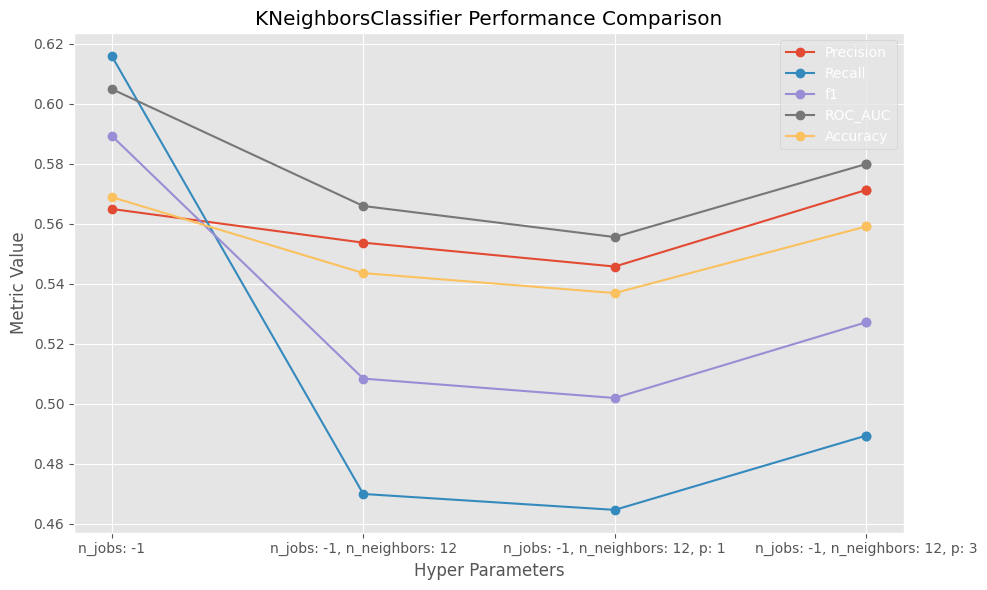

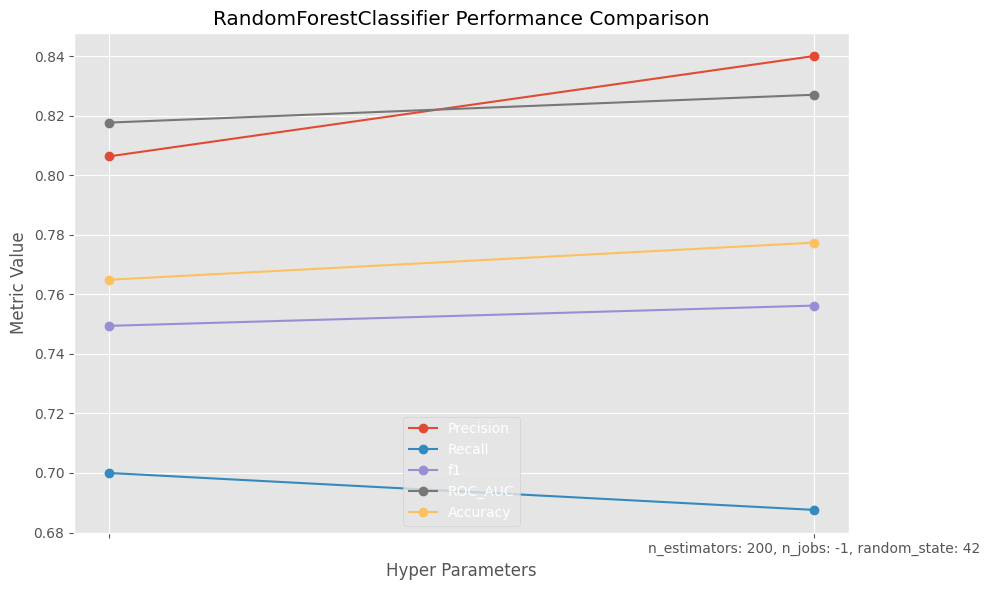

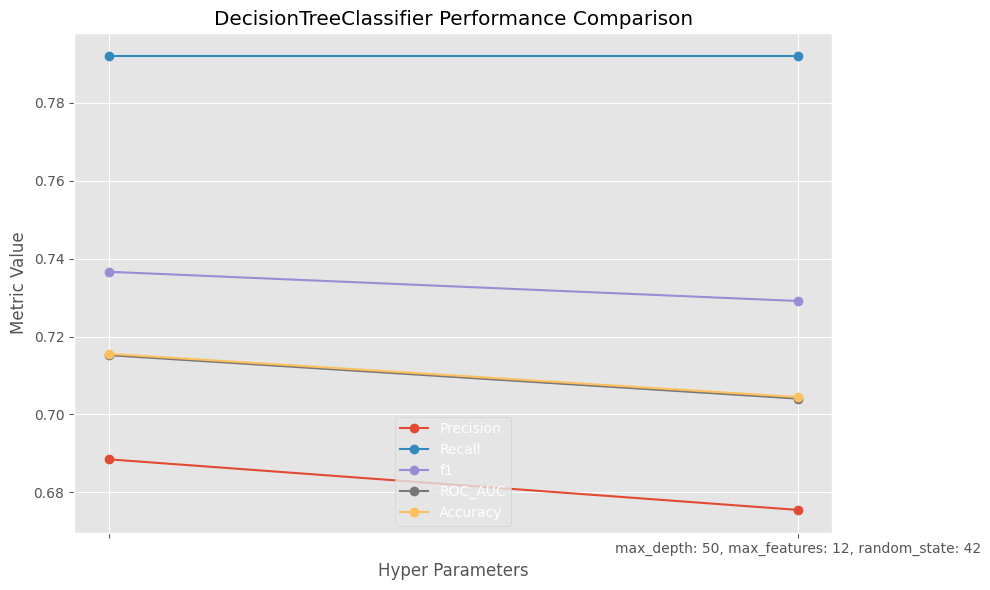

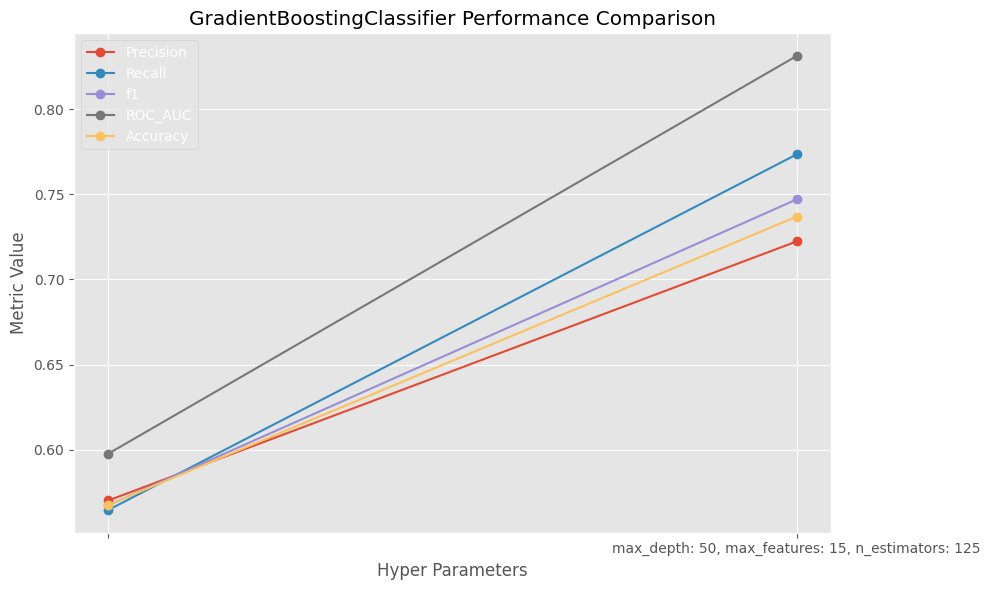

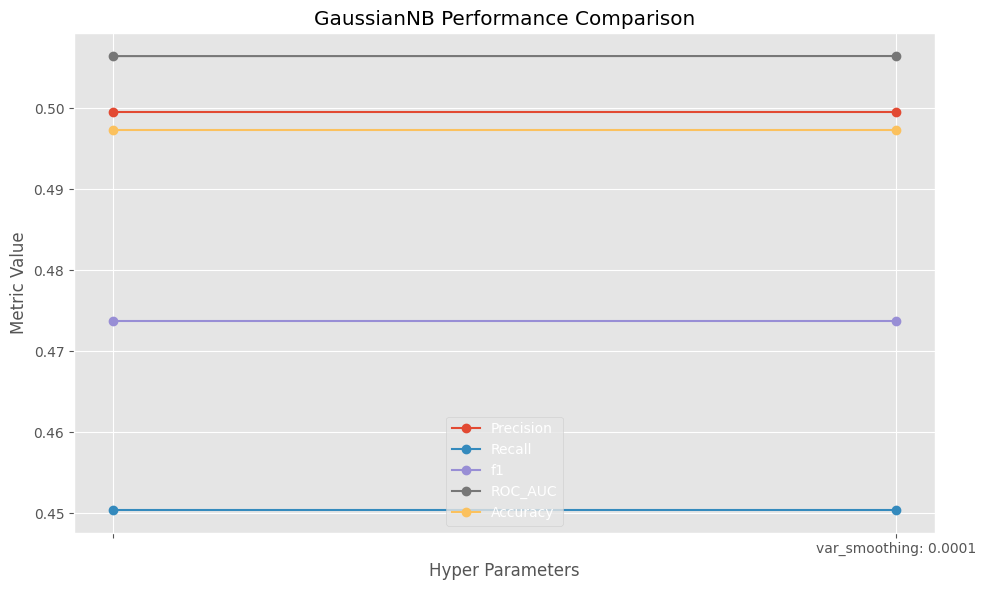

In [109]:
metric_display = {
    'Precision': 'Precision',
    'Recall': 'Recall',
    'f1': 'f1',
    'ROC_AUC': 'ROC_AUC',
    'Accuracy': 'Accuracy',
}

def show_hyper_parameter_difference(results):
    classifiers = {}
    for result in results:
        classifier_name = result['Classifier']
        if classifier_name not in classifiers:
            classifiers[classifier_name] = {'Hyper Parameters': [], 'Metrics': {metric: [] for metric in metric_display}}

        hyper_params_str = ', '.join([f"{key}: {value}" for key, value in result['Hyper Parameters'].items()])
        classifiers[classifier_name]['Hyper Parameters'].append(hyper_params_str)
        for metric, value in result.items():
            if metric != 'Classifier' and metric != 'Hyper Parameters':
                classifiers[classifier_name]['Metrics'][metric_display[metric]].append(value)

    plt.style.use('ggplot')

    # Plotting
    for classifier_name, data in classifiers.items():
        hyper_params = data['Hyper Parameters']
        metrics = data['Metrics']

        plt.figure(figsize=(10, 6))
        for metric_name, values in metrics.items():
            plt.plot(hyper_params, values, marker='o', label=metric_name)


        plt.title(f'{classifier_name} Performance Comparison', color='black')
        plt.xlabel('Hyper Parameters')
        plt.ylabel('Metric Value')
        plt.legend()
        plt.xticks()
        plt.tight_layout()
        plt.show()


show_hyper_parameter_difference(lasso_results)

3- PCA (Principal Component Analysis)

* Using LogisticRegression


In [110]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=12) # reduction of the features to 12.

pca_results = []

pca.fit(X_min_max)

data_pca = pca.transform(X_min_max)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(data_pca, y, test_size=0.2, random_state=42)


def calculate_pca(classifier, classifier_name , default_classifier):
    classifier.fit(X_train_pca, y_train_pca)
    y_pred_pca = classifier.predict(X_test_pca)

    accuracy = accuracy_score(y_test_pca, y_pred_pca)
    precision = precision_score(y_test_pca, y_pred_pca)
    recall = recall_score(y_test_pca, y_pred_pca)
    f1 = f1_score(y_test_pca, y_pred_pca)
    roc_auc = roc_auc_score(y_test_pca, y_pred_pca)


    print(f"Classifier: {classifier_name}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}, Accuracy: {accuracy:.4f}")
    print("-" * 50)

    is_better_method("PCA", accuracy, precision, recall, f1, roc_auc, 0 , [], classifier_name)

    default_params = default_classifier.get_params()

    current_params = classifier.get_params()

    non_default_params = {key: value for key, value in current_params.items() if value != default_params[key]}


    comparison_metrics = {
        "Precision": precision,
        "Recall": recall,
        "f1": f1,
        "ROC_AUC": roc_auc,
        "Accuracy": accuracy,
        "Classifier": classifier_name,
        "Hyper Parameters": non_default_params
    }

    return comparison_metrics


pca_results.append(calculate_pca(classifier=LogisticRegression() , classifier_name="LogisticRegression", default_classifier=LogisticRegression()))

Classifier: LogisticRegression
Precision: 0.4996, Recall: 0.5133, F1-score: 0.5063
ROC AUC: 0.4973, Accuracy: 0.4973
--------------------------------------------------


*Using LogisticRegression classifier with Hyper Parameter Tuning*

* C = 1.0 Regularization parameter, It controls the regularization strength, helping prevent overfitting. Lower values indicate stronger regularization.
* solver = 'liblinear' Different optimization algorithms can be used to fit parameters, such as ‘liblinear’, ‘newton-cg’, ‘lbfgs’, ‘sag’, and ‘saga’.
* penalty = 12 It determines the type of regularization: L1 (Lasso) or L2 (Ridge). L1 regularization leads to sparsity in coefficients.
* max_iter = 100 The maximum number of iterations taken for the solver to converge.
* random_state = 42 Controls the randomness for reproducibility.

In [111]:
# Optimization algorithm 'liblinear'
pca_results.append(calculate_pca(classifier=LogisticRegression(C=1.0, solver='liblinear', penalty='l1', max_iter=100, random_state=42) , classifier_name="LogisticRegression" , default_classifier=LogisticRegression()))

Classifier: LogisticRegression
Precision: 0.5004, Recall: 0.5159, F1-score: 0.5081
ROC AUC: 0.4981, Accuracy: 0.4982
--------------------------------------------------


In [112]:
# Optimization algorithm 'liblinear'
pca_results.append(calculate_pca(classifier=LogisticRegression(C=1.0, solver='saga', penalty='l1', max_iter=100, random_state=42) , classifier_name="LogisticRegression", default_classifier=LogisticRegression()))

Classifier: LogisticRegression
Precision: 0.5017, Recall: 0.5150, F1-score: 0.5083
ROC AUC: 0.4995, Accuracy: 0.4996
--------------------------------------------------


*  Using RandomForestClassifier

In [113]:
pca_results.append(calculate_pca(classifier=RandomForestClassifier(n_jobs=-1) , classifier_name="RandomForestClassifier", default_classifier=RandomForestClassifier()))

Classifier: RandomForestClassifier
Precision: 0.7719, Recall: 0.7159, F1-score: 0.7429
ROC AUC: 0.7513, Accuracy: 0.7511
--------------------------------------------------


*RandomForestClassifier with Hyper Parameter Tuning*

In [114]:
pca_results.append(calculate_pca(classifier=RandomForestClassifier(n_estimators=300,random_state=42, n_jobs=-1, max_depth=50,max_features=12),classifier_name="RandomForestClassifier", default_classifier=RandomForestClassifier()))

Classifier: RandomForestClassifier
Precision: 0.7549, Recall: 0.7221, F1-score: 0.7381
ROC AUC: 0.7428, Accuracy: 0.7427
--------------------------------------------------


*  Using SVM (Support Vector Machine) Classifier

In [115]:
from sklearn.svm import SVC

pca_results.append(calculate_pca(classifier=SVC(), classifier_name="SVM", default_classifier=SVC()))

Classifier: SVM
Precision: 0.5464, Recall: 0.5212, F1-score: 0.5335
ROC AUC: 0.5423, Accuracy: 0.5422
--------------------------------------------------


*Using SVM (Support Vector Machine) Classifier with Hyper Parameter Tuning*

* C = 1.0 Regularization parameter. It controls the trade-off between maximizing the margin and minimizing the classification error. Higher values of C allow for more complex decision boundaries, potentially leading to overfitting.
* kernel = 'rbf' SVM can use different kernel functions to map data into higher-dimensional spaces. Common choices include
 *  Linear Kernel
 *  Polynomial Kernel
 * RBF (Radial Basis Function) Kernel
* gamma = 'scale' (for RBF Kernel): A parameter for the RBF kernel that determines the influence of a single training example. Low values mean 'far' points have a high influence, while high values mean only 'close' points have an influence.

In [116]:
pca_results.append(calculate_pca(classifier=SVC(kernel='rbf', C=5,gamma='scale'), classifier_name="SVM", default_classifier=SVC()))

Classifier: SVM
Precision: 0.5713, Recall: 0.5708, F1-score: 0.5710
ROC AUC: 0.5693, Accuracy: 0.5693
--------------------------------------------------


*  Using DecisionTreeClassifier

In [117]:
pca_results.append(calculate_pca(classifier=DecisionTreeClassifier(),classifier_name="DecisionTreeClassifier", default_classifier=DecisionTreeClassifier()))

Classifier: DecisionTreeClassifier
Precision: 0.6639, Recall: 0.7726, F1-score: 0.7141
ROC AUC: 0.6890, Accuracy: 0.6893
--------------------------------------------------


*Using DecisionTreeClassifier with Hyper Parameter Tuning*

In [118]:
pca_results.append(calculate_pca(classifier=DecisionTreeClassifier(criterion='log_loss',max_depth=50,random_state=42, max_features=17),classifier_name="DecisionTreeClassifier", default_classifier=DecisionTreeClassifier()))

Classifier: DecisionTreeClassifier
Precision: 0.6692, Recall: 0.7947, F1-score: 0.7265
ROC AUC: 0.6991, Accuracy: 0.6996
--------------------------------------------------


* Using GradientBoostingClassifier


In [119]:
pca_results.append(calculate_pca(classifier=GradientBoostingClassifier(),classifier_name="GradientBoostingClassifier", default_classifier=GradientBoostingClassifier()))

Classifier: GradientBoostingClassifier
Precision: 0.5615, Recall: 0.5212, F1-score: 0.5406
ROC AUC: 0.5553, Accuracy: 0.5551
--------------------------------------------------


*Using GradientBoostingClassifier with Hyper Parameter Tuning*

In [120]:
pca_results.append(calculate_pca(classifier=GradientBoostingClassifier(n_estimators=125,learning_rate=0.1,max_features=15,max_depth=50),classifier_name="GradientBoostingClassifier", default_classifier=GradientBoostingClassifier()))

Classifier: GradientBoostingClassifier
Precision: 0.6713, Recall: 0.7752, F1-score: 0.7195
ROC AUC: 0.6961, Accuracy: 0.6964
--------------------------------------------------


*  Using Naive Bayes Classifier

In [121]:
pca_results.append(calculate_pca(classifier=GaussianNB(),classifier_name="GaussianNB", default_classifier=GaussianNB()))

Classifier: GaussianNB
Precision: 0.5194, Recall: 0.5221, F1-score: 0.5207
ROC AUC: 0.5173, Accuracy: 0.5173
--------------------------------------------------


*Using Naive Bayes Classifier with Hyper Parameter Tuning*

In [122]:
pca_results.append(calculate_pca(classifier=GaussianNB(priors=[0.50,0.50], var_smoothing=1e-12),classifier_name="GaussianNB" , default_classifier=GaussianNB()))

Classifier: GaussianNB
Precision: 0.5183, Recall: 0.5257, F1-score: 0.5220
ROC AUC: 0.5164, Accuracy: 0.5164
--------------------------------------------------


In [123]:
for result in pca_results:
    print(result)

{'Precision': 0.49956933677863913, 'Recall': 0.5132743362831859, 'f1': 0.5063291139240506, 'ROC_AUC': 0.4972621681415929, 'Accuracy': 0.49733333333333335, 'Classifier': 'LogisticRegression', 'Hyper Parameters': {}}
{'Precision': 0.5004291845493563, 'Recall': 0.515929203539823, 'f1': 0.5080610021786491, 'ROC_AUC': 0.49814317319848295, 'Accuracy': 0.49822222222222223, 'Classifier': 'LogisticRegression', 'Hyper Parameters': {'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}}
{'Precision': 0.5017241379310344, 'Recall': 0.5150442477876106, 'f1': 0.508296943231441, 'ROC_AUC': 0.499486409608091, 'Accuracy': 0.49955555555555553, 'Classifier': 'LogisticRegression', 'Hyper Parameters': {'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}}
{'Precision': 0.7719465648854962, 'Recall': 0.715929203539823, 'f1': 0.7428833792470156, 'ROC_AUC': 0.7512681731984829, 'Accuracy': 0.7511111111111111, 'Classifier': 'RandomForestClassifier', 'Hyper Parameters': {'n_jobs': -1}}
{'Precision': 0.7548

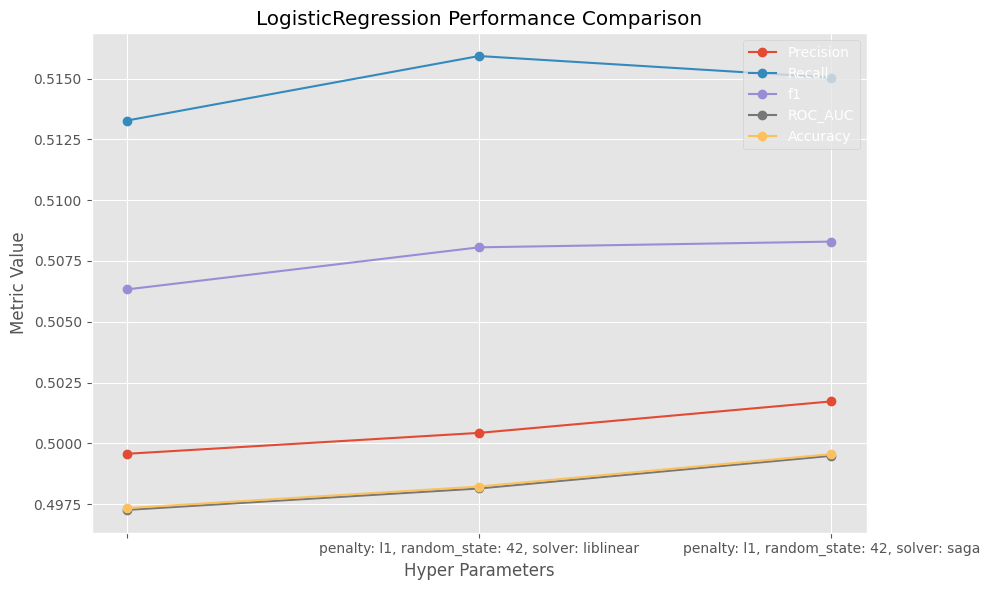

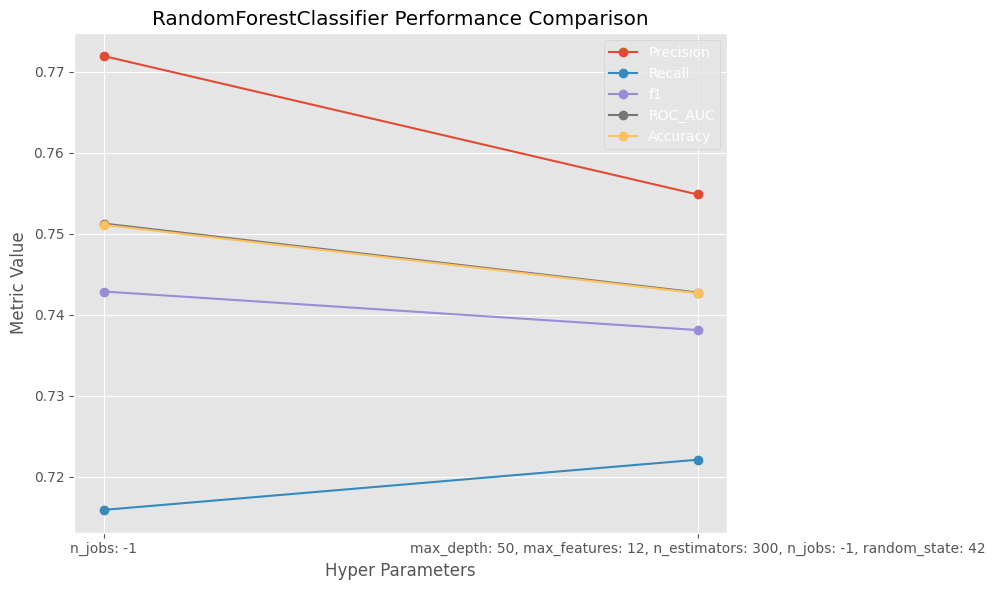

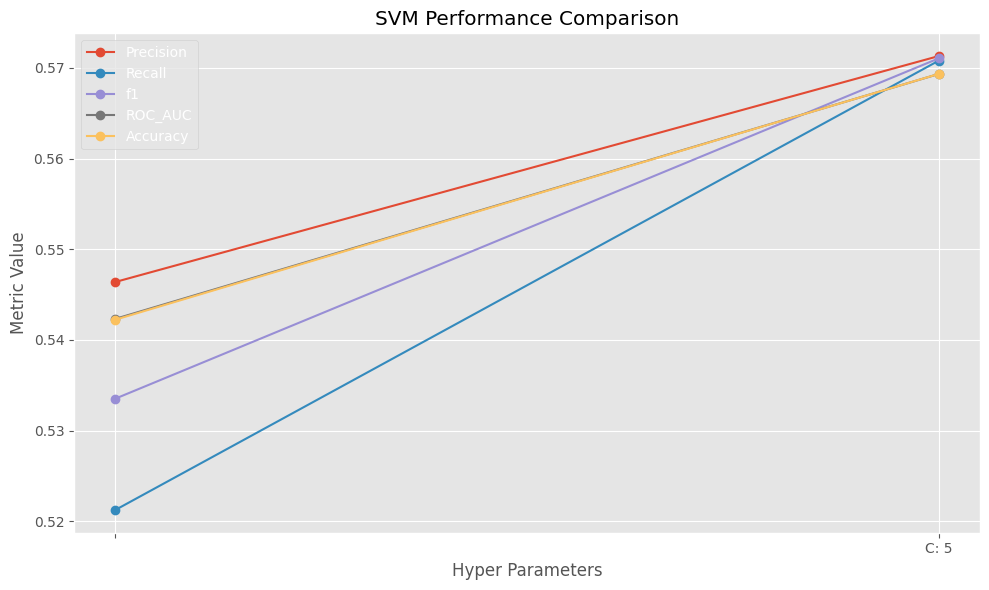

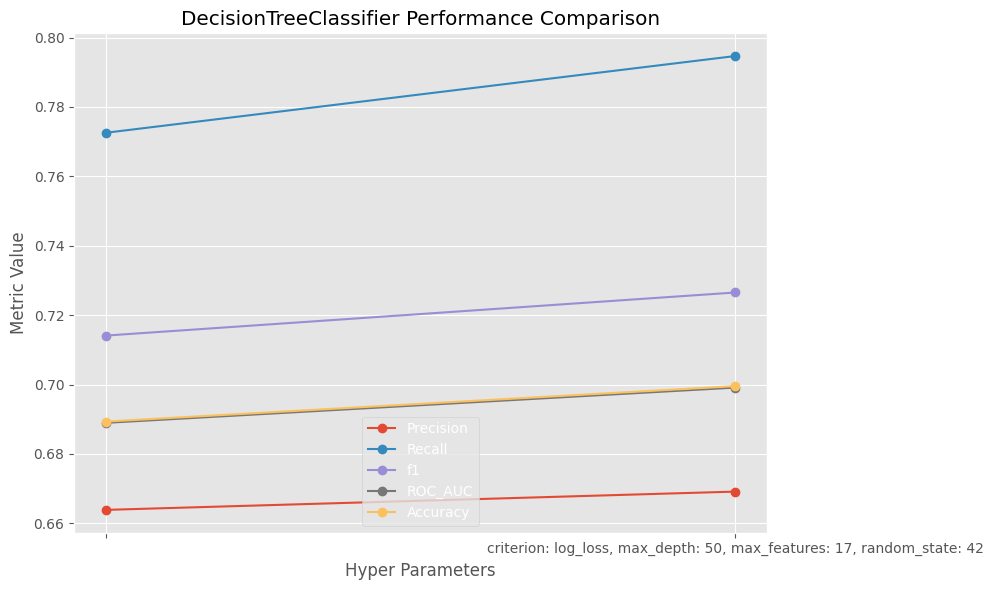

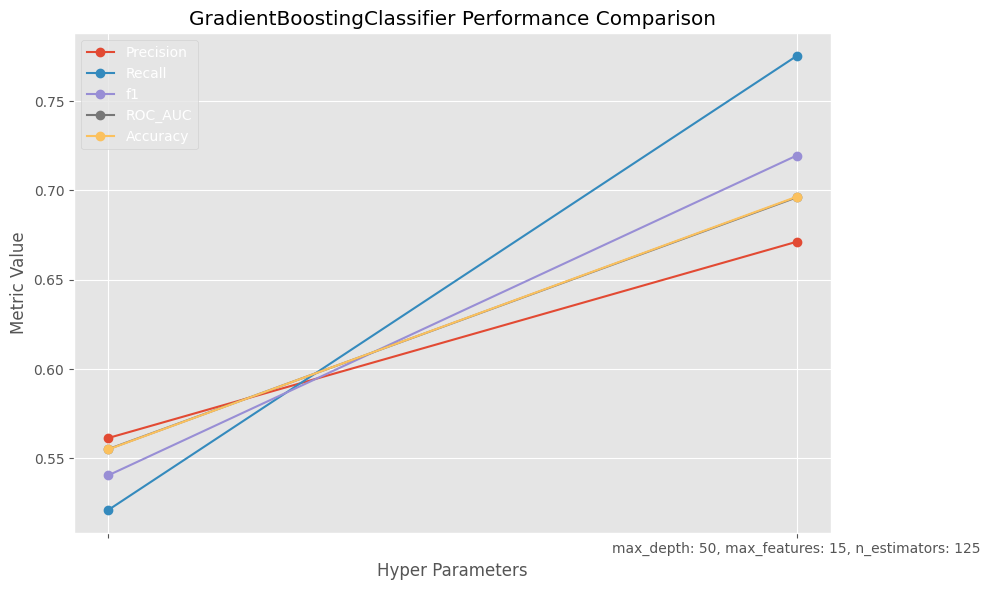

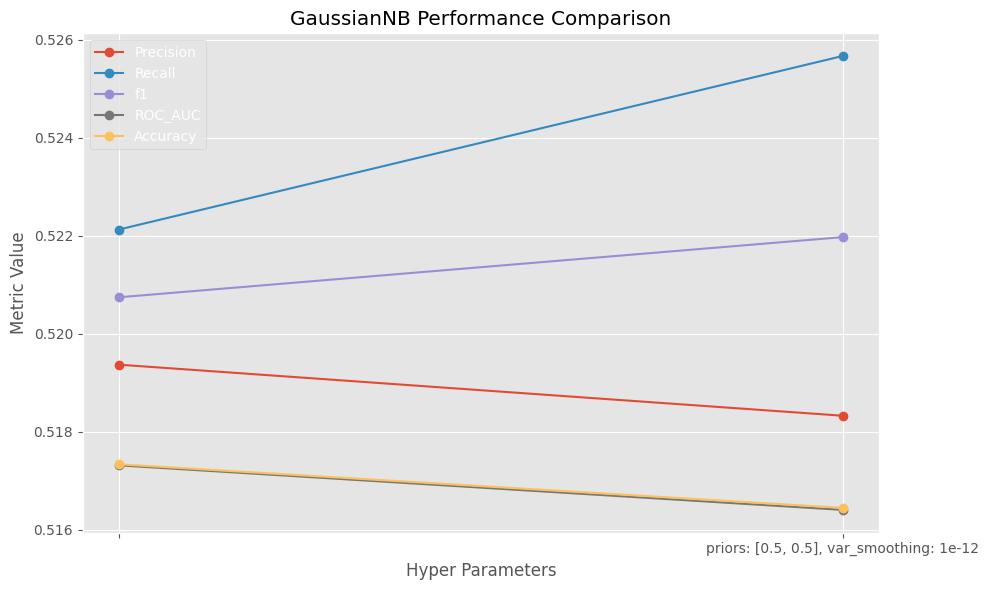

In [124]:
show_hyper_parameter_difference(pca_results)

4- RFE (Recursive Feature Elimination)

*  Using LogisticRegression


In [125]:
from sklearn.feature_selection import RFE

X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)


rfe_results = []


def calculate_rfe(classifier,classifier_name, default_classifier):

    rfe = RFE(estimator=classifier,n_features_to_select=15)

    rfe.fit(X_train, y_train)

    selected_features = rfe.support_

    selected_columns = X_train.columns[selected_features]

    # Use the selected columns to filter X_train and X_test
    X_train_rfe = X_train[selected_columns]
    X_test_rfe = X_test[selected_columns]

    classifier.fit(X_train_rfe, y_train)

    y_pred_rfe = classifier.predict(X_test_rfe)

    accuracy = accuracy_score(y_test, y_pred_rfe)
    precision = precision_score(y_test, y_pred_rfe)
    recall = recall_score(y_test, y_pred_rfe)
    f1 = f1_score(y_test, y_pred_rfe)
    roc_auc = roc_auc_score(y_test, y_pred_rfe)

    print(f"Classifier: {classifier_name}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}, Accuracy: {accuracy:.4f}")
    print("-" * 50)

    feature_num = 0

    for feature in selected_features:
        if feature == True:
            feature_num +=1


    is_better_method("RFE", accuracy, precision, recall, f1, roc_auc, feature_num , selected_features, classifier_name)

    default_params = default_classifier.get_params()

    current_params = classifier.get_params()

    non_default_params = {key: value for key, value in current_params.items() if value != default_params[key]}


    comparison_metrics = {
        "Precision": precision,
        "Recall": recall,
        "f1": f1,
        "ROC_AUC": roc_auc,
        "Accuracy": accuracy,
        "Classifier": classifier_name,
        "Hyper Parameters": non_default_params
    }

    return comparison_metrics

rfe_results.append(calculate_rfe(classifier=LogisticRegression(),classifier_name="LogisticRegression", default_classifier=LogisticRegression()))

Classifier: LogisticRegression
Precision: 0.5057, Recall: 0.5124, F1-score: 0.5090
ROC AUC: 0.5035, Accuracy: 0.5036
--------------------------------------------------


*Using LogisticRegression with Hyper Parameter Tuning*

In [126]:
rfe_results.append(calculate_rfe(classifier=LogisticRegression(C=1.0, solver='liblinear', penalty='l1', max_iter=100, random_state=42) , classifier_name="LogisticRegression", default_classifier=LogisticRegression()))

Classifier: LogisticRegression
Precision: 0.5044, Recall: 0.5080, F1-score: 0.5062
ROC AUC: 0.5022, Accuracy: 0.5022
--------------------------------------------------


*  Using DecisionTreeClassifier

In [127]:
rfe_results.append(calculate_rfe(classifier=DecisionTreeClassifier(),classifier_name="DecisionTreeClassifier",default_classifier=DecisionTreeClassifier()))

Classifier: DecisionTreeClassifier
Precision: 0.6657, Recall: 0.7929, F1-score: 0.7237
ROC AUC: 0.6956, Accuracy: 0.6960
--------------------------------------------------


*Using DecisionTreeClassifier with Hyper Parameter Tuning*

In [128]:
rfe_results.append(calculate_rfe(classifier=DecisionTreeClassifier(criterion='gini',max_depth=50,random_state=42, max_features=12),classifier_name="DecisionTreeClassifier", default_classifier=DecisionTreeClassifier()))

Classifier: DecisionTreeClassifier
Precision: 0.6702, Recall: 0.7735, F1-score: 0.7182
ROC AUC: 0.6948, Accuracy: 0.6951
--------------------------------------------------


*  Using RandomForestClassifier

In [129]:
rfe_results.append(calculate_rfe(classifier=RandomForestClassifier(n_jobs=-1),classifier_name="RandomForestClassifier",default_classifier=RandomForestClassifier()))

Classifier: RandomForestClassifier
Precision: 0.8528, Recall: 0.7027, F1-score: 0.7705
ROC AUC: 0.7902, Accuracy: 0.7898
--------------------------------------------------


*Using RandomForestClassifier with Hyper Parameter Tuning*

In [130]:
rfe_results.append(calculate_rfe(classifier=RandomForestClassifier(n_estimators=200,random_state=42, n_jobs=-1),classifier_name="RandomForestClassifier",default_classifier=RandomForestClassifier()))

Classifier: RandomForestClassifier
Precision: 0.8675, Recall: 0.6956, F1-score: 0.7721
ROC AUC: 0.7942, Accuracy: 0.7938
--------------------------------------------------


In [131]:
for result in rfe_results:
    print(result)

{'Precision': 0.5056768558951965, 'Recall': 0.5123893805309735, 'f1': 0.5090109890109891, 'ROC_AUC': 0.5035161188369154, 'Accuracy': 0.5035555555555555, 'Classifier': 'LogisticRegression', 'Hyper Parameters': {}}
{'Precision': 0.5043936731107206, 'Recall': 0.5079646017699115, 'f1': 0.5061728395061729, 'ROC_AUC': 0.5021965865992415, 'Accuracy': 0.5022222222222222, 'Classifier': 'LogisticRegression', 'Hyper Parameters': {'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}}
{'Precision': 0.6656760772659732, 'Recall': 0.7929203539823009, 'f1': 0.7237479806138934, 'ROC_AUC': 0.6955673198482933, 'Accuracy': 0.696, 'Classifier': 'DecisionTreeClassifier', 'Hyper Parameters': {}}
{'Precision': 0.6702453987730062, 'Recall': 0.7734513274336283, 'f1': 0.7181594083812654, 'ROC_AUC': 0.6947613780025286, 'Accuracy': 0.6951111111111111, 'Classifier': 'DecisionTreeClassifier', 'Hyper Parameters': {'max_depth': 50, 'max_features': 12, 'random_state': 42}}
{'Precision': 0.8528464017185822, 'Recal

*  Using GradientBoostingClassifier

In [132]:
rfe_results.append(calculate_rfe(classifier=GradientBoostingClassifier(),classifier_name="GradientBoostingClassifier",default_classifier=GradientBoostingClassifier()))

Classifier: GradientBoostingClassifier
Precision: 0.5766, Recall: 0.5796, F1-score: 0.5781
ROC AUC: 0.5751, Accuracy: 0.5751
--------------------------------------------------


*Using GradientBoostingClassifier with Hyper Parameter Tuning*

In [133]:
rfe_results.append(calculate_rfe(classifier=GradientBoostingClassifier(n_estimators=125,learning_rate=0.1,max_features=15,max_depth=50),classifier_name="GradientBoostingClassifier",default_classifier=GradientBoostingClassifier()))

Classifier: GradientBoostingClassifier
Precision: 0.6605, Recall: 0.7885, F1-score: 0.7188
ROC AUC: 0.6898, Accuracy: 0.6902
--------------------------------------------------


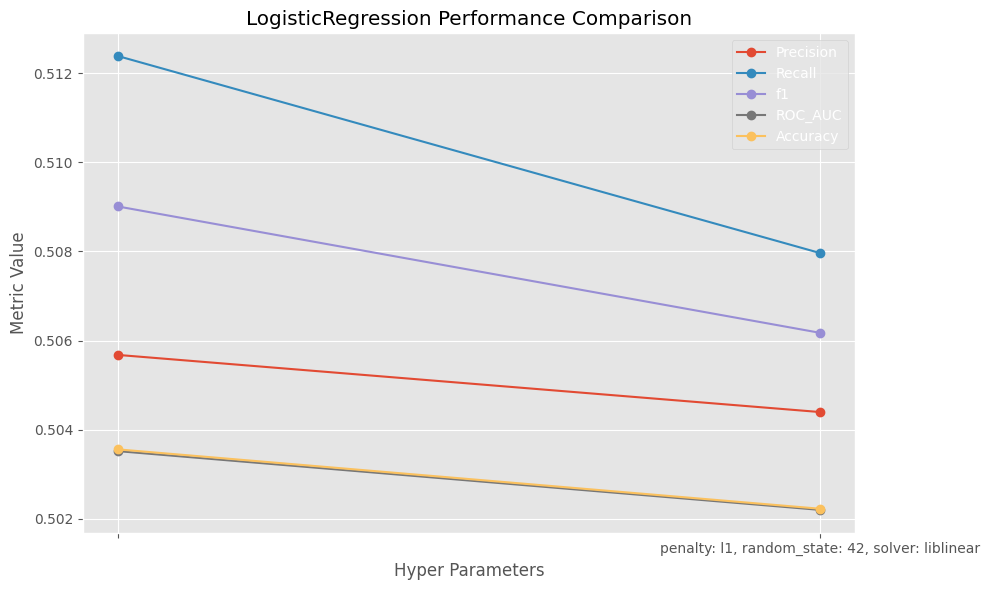

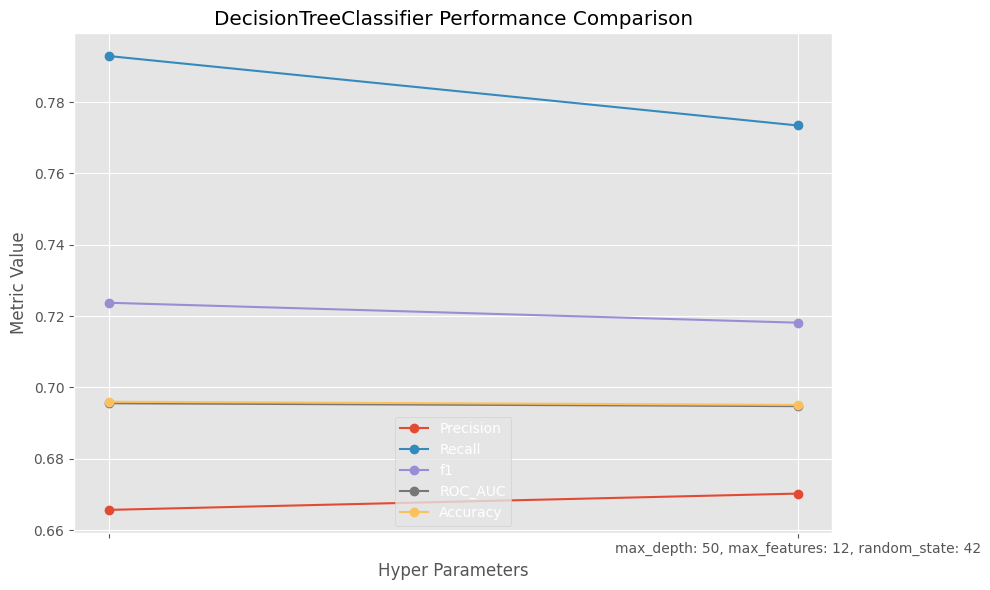

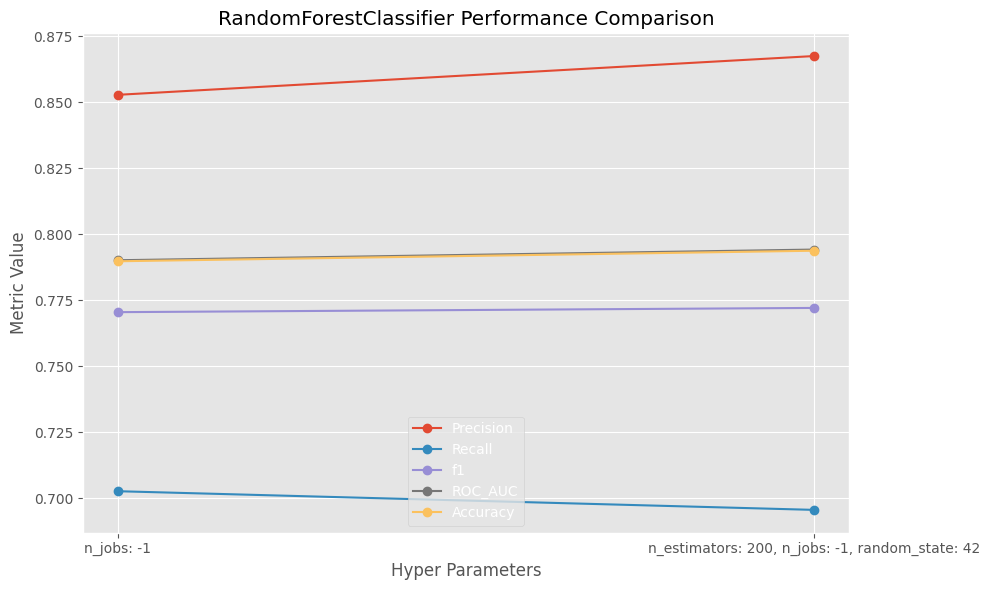

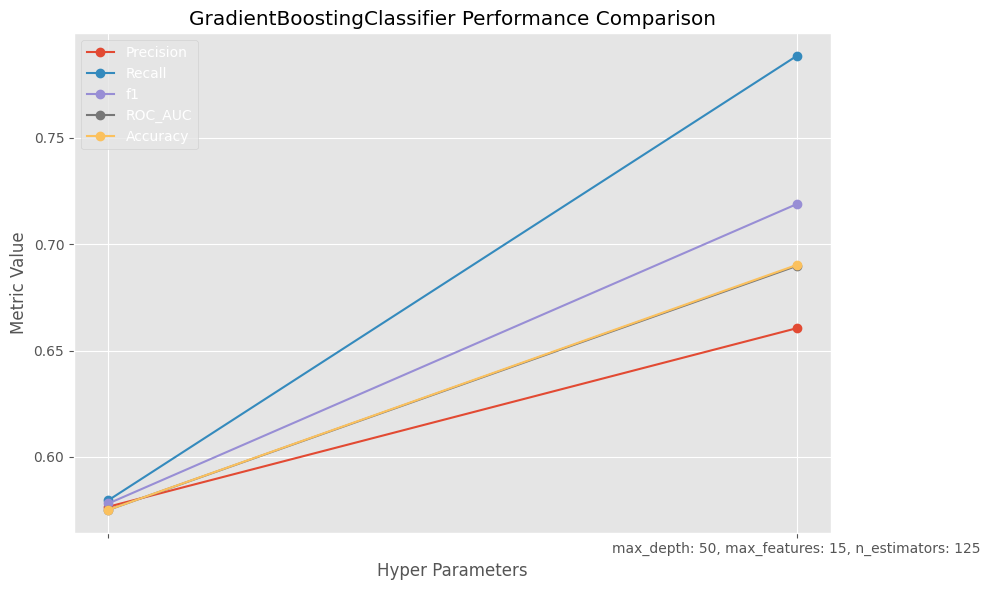

In [134]:
show_hyper_parameter_difference(rfe_results)

5- Stacking

*  In stacking, the final estimator, also known as a meta-learner or meta-model, is the model that combines the predictions of the base models to make the final predictions. After the base models make their individual predictions, the final forecaster learns to effectively combine these predictions to provide an overall prediction.

In [135]:
from sklearn.ensemble import StackingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)

base_models = [
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTreeClassifier', DecisionTreeClassifier(criterion='gini',max_depth=50,random_state=42, max_features=12)),
    ('RandomForestClassifier1', RandomForestClassifier(n_estimators=75, n_jobs=-1)),
    ('RandomForestClassifier2', RandomForestClassifier(n_estimators=100, n_jobs=-1)),
    ('RandomForestClassifier3', RandomForestClassifier(n_estimators=125, n_jobs=-1)),
    ('RandomForestClassifier4', RandomForestClassifier(n_estimators=150, n_jobs=-1)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=125,learning_rate=0.1,max_features=15,max_depth=50)),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

stacked_model = StackingClassifier(estimators = base_models, final_estimator=RandomForestClassifier())

stacked_model.fit(X_train, y_train) # training the stacked_model

stacked_predictions = stacked_model.predict(X_test) # making predictions with stacked_model

accuracy = accuracy_score(y_test, stacked_predictions)
precision = precision_score(y_test, stacked_predictions)
recall = recall_score(y_test, stacked_predictions)
f1 = f1_score(y_test, stacked_predictions)
roc_auc = roc_auc_score(y_test, stacked_predictions)

is_better_method("Stacking",accuracy,precision,recall,f1,roc_auc,0,[], classifier_name="RandomForestClassifier")

In [136]:
def print_best_selection_methods():
    for method in best_selection_methods:

        if method == "PCA" or method == "lasso" or method == "RFE" or method =="Stacking" or method == "Max Voting":
            print(f"Classifier: {best_selection_methods[method]['Classifier']}")

        print("Name:{}, Accuracy:{},  Precision:{}, Recall:{}, f1:{}, ROC_AUC:{}, feature_number:{},  Features:{}".format(method,
            best_selection_methods[method]['Accuracy'], best_selection_methods[method]['Precision'], best_selection_methods[method]['Recall'],
            best_selection_methods[method]['f1'], best_selection_methods[method]['ROC_AUC'], best_selection_methods[method]['Feature_number'],
            best_selection_methods[method]['Features']
            ))
        print("-"*50)

6- Max Voting

In [137]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_standard = pd.DataFrame(scaler.fit_transform(X))

x_train, x_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=42)


def calculate_max_voting(estimators):

    max_voting_model = VotingClassifier(estimators=estimators)
    max_voting_model.fit(x_train,y_train)

    max_voting_pred = max_voting_model.predict(x_test)

    accuracy = accuracy_score(y_test, max_voting_pred)
    precision = precision_score(y_test, max_voting_pred)
    recall = recall_score(y_test, max_voting_pred)
    f1 = f1_score(y_test, max_voting_pred)
    roc_auc = roc_auc_score(y_test, max_voting_pred)

    is_better_method("Max Voting", accuracy, precision, recall, f1, roc_auc, 0, [], estimators)


estimators = []

estimators.append(('dtc',DecisionTreeClassifier()))
estimators.append(('gbc',GradientBoostingClassifier(random_state=42)))
estimators.append(('rfc',RandomForestClassifier(n_estimators=125)))
estimators.append(('nb',GaussianNB())) # gaussian naive bayes
estimators.append(('lr',LogisticRegression()))

calculate_max_voting(estimators=estimators)

In [138]:
print_best_selection_methods()

Name:chi2, Accuracy:0.7928888888888889,  Precision:0.8738738738738738, Recall:0.6867256637168142, f1:0.7690782953419227, ROC_AUC:0.830274178255373, feature_number:21,  Features:Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day',
       'Income', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'is_male', 'systolic_pressure',
       'diastolic_pressure'],
      dtype='object')
--------------------------------------------------
Name:mutual_info_classif, Accuracy:0.7928888888888889,  Precision:0.8705357142857143, Recall:0.6902654867256637, f1:0.7699901283316881, ROC_AUC:0.8334533027812896, feature_number:15,  Features:Index(['Cholesterol', 'Heart Rate', 'Obesity', 'Exercise Hours Per Week',
       'Diet', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'Triglyc

# Visualization of the Results

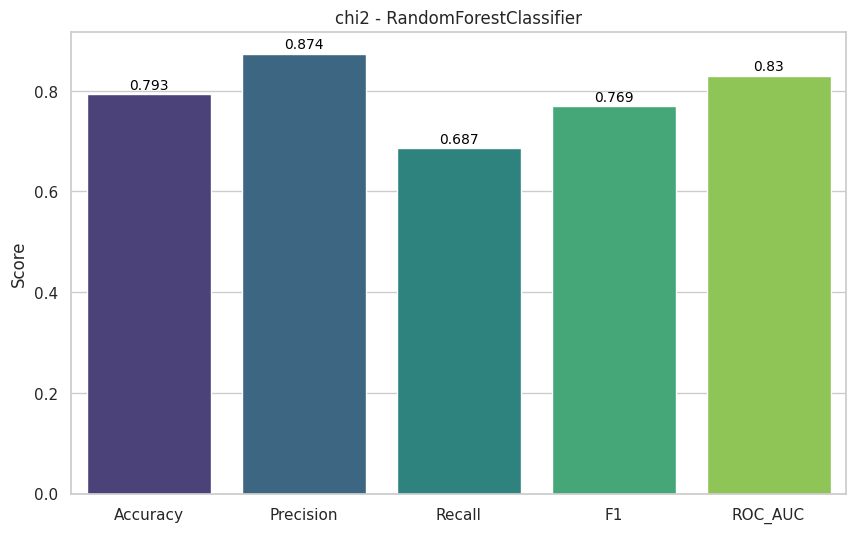

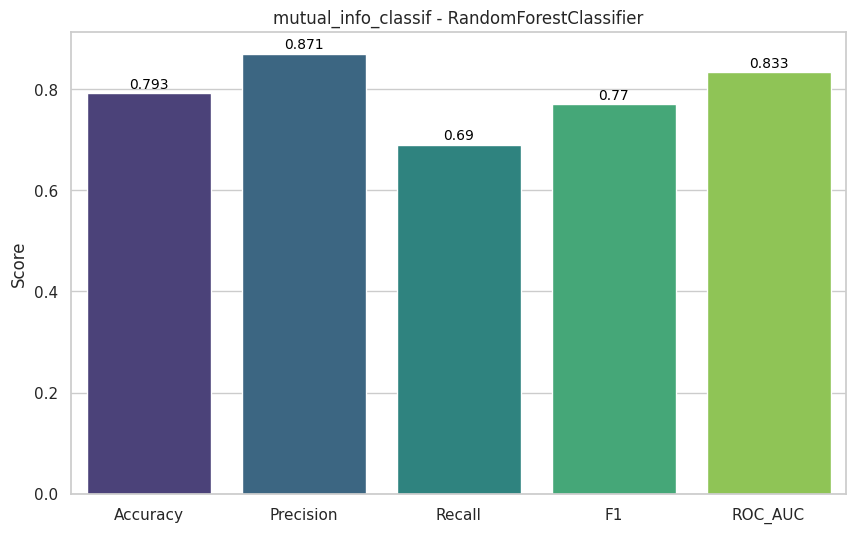

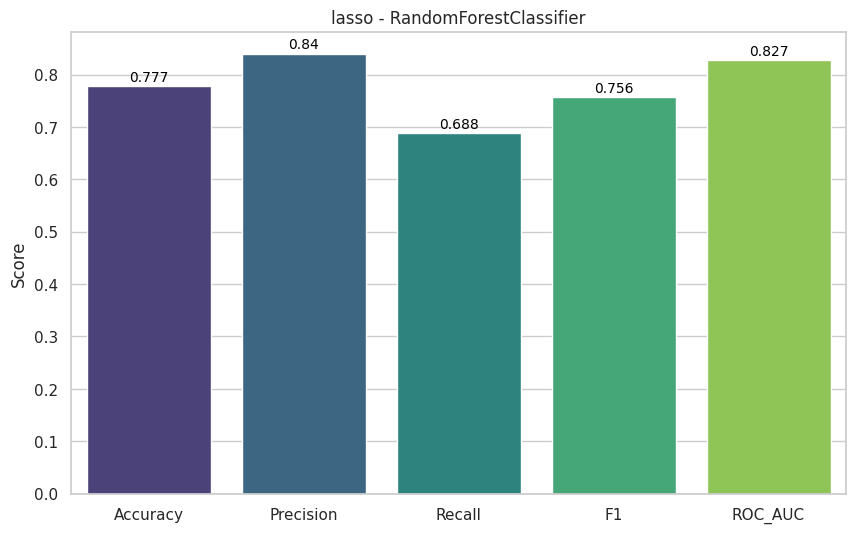

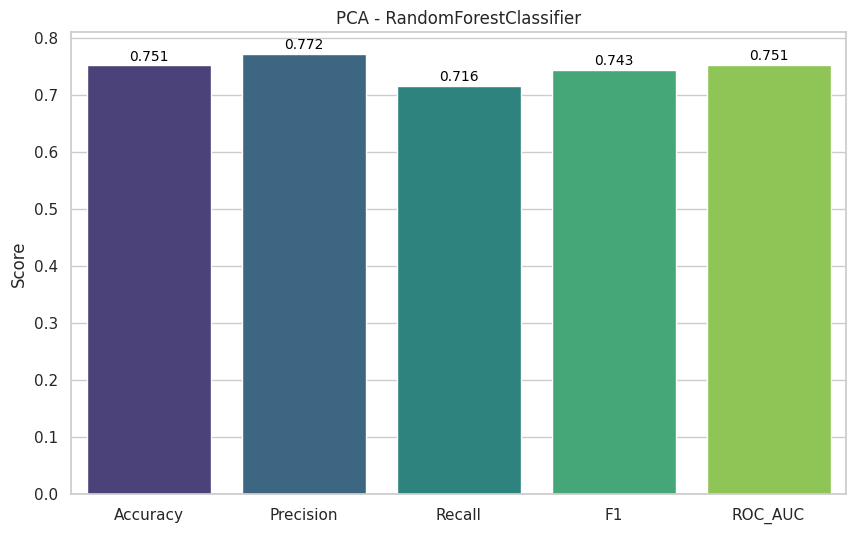

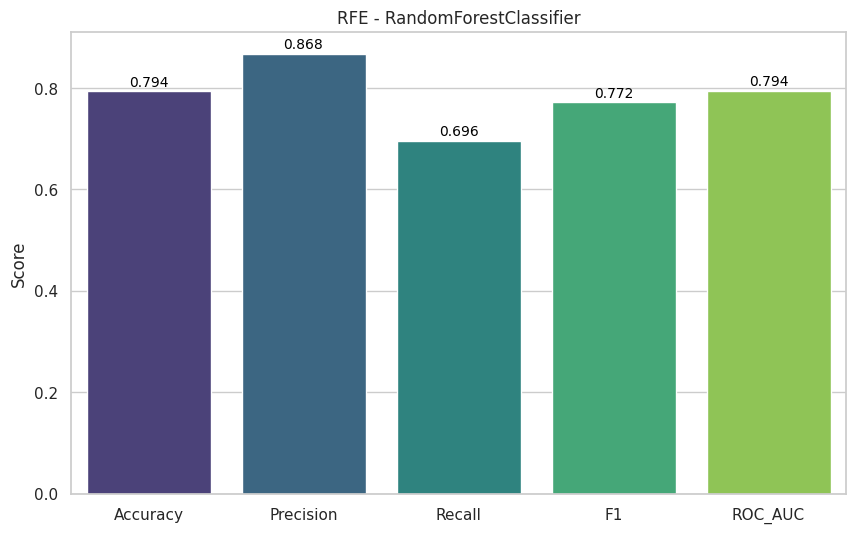

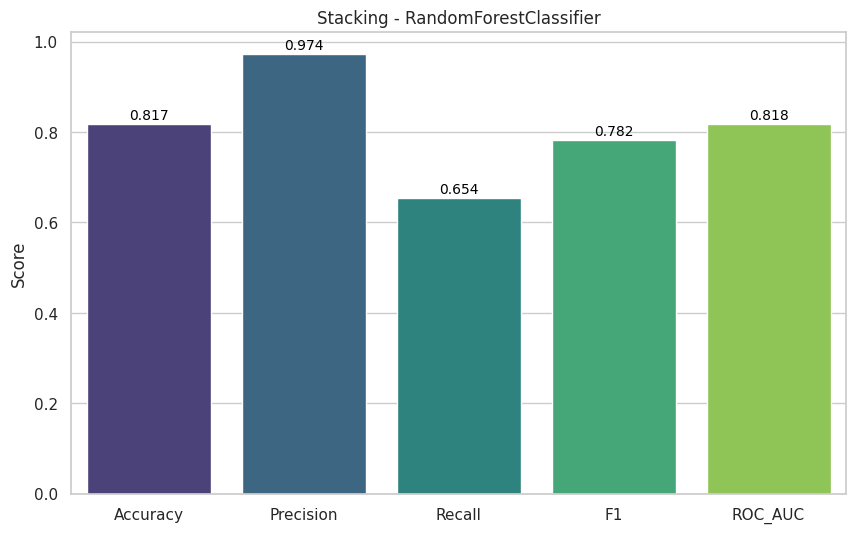

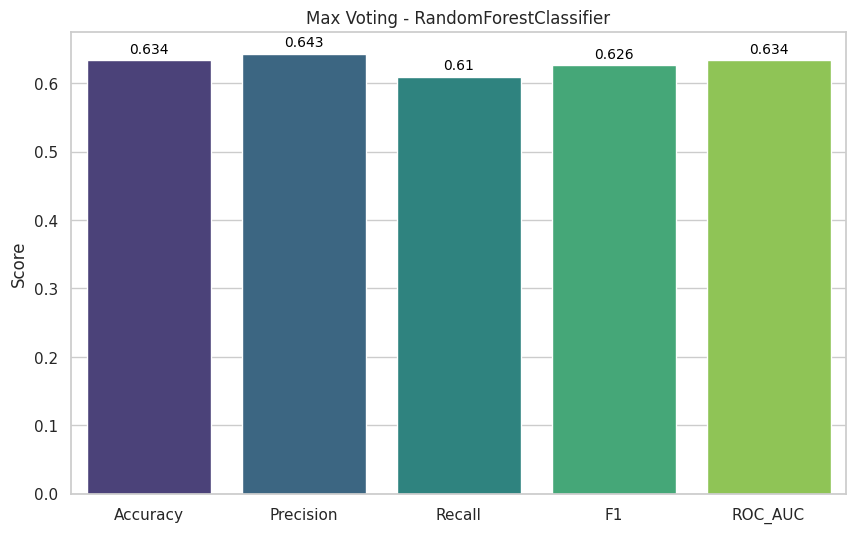

In [139]:
metrics = {
    'Accuracy': 0,
    'Precision': 0,
    'Recall': 0,
    'F1': 0,
    'ROC_AUC': 0
}

def show_plots():
    for method in best_selection_methods:
        metrics['Accuracy'] = best_selection_methods[method]['Accuracy']
        metrics['Precision'] = best_selection_methods[method]['Precision']
        metrics['Recall'] = best_selection_methods[method]['Recall']
        metrics['F1'] = best_selection_methods[method]['f1']
        metrics['ROC_AUC'] = best_selection_methods[method]['ROC_AUC']

        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        metrics_plot = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), hue=list(metrics.keys()), dodge=False, legend=False, palette="viridis")

        if method == "Stacking":
            plot_title = method +" - "+ "RandomForestClassifier"
        elif method == "Max Voting":
            plot_title = method +" - "+"RandomForestClassifier"
        else:
            plot_title = method +" - "+ best_selection_methods[method]['Classifier']

        metrics_plot.set_title(plot_title)
        metrics_plot.set_ylabel('Score')


        for index, value in enumerate(metrics.values()):
            metrics_plot.text(index, value + 0.01, str(round(value, 3)), ha='center', color='black', fontsize=10)

        plt.show()


show_plots()

* Comparing the scores of the classifiers

In [141]:
results = pd.DataFrame.from_dict(best_selection_methods, orient='index')

results

,Accuracy,Precision,Recall,f1,ROC_AUC,Feature_number,Features,Classifier
chi2,0.792889,0.873874,0.686726,0.769078,0.830274,21,"Index(['Age', 'Cholesterol', 'Heart Rate', 'Di...",RandomForestClassifier
mutual_info_classif,0.792889,0.870536,0.690265,0.769990,0.833453,15,"Index(['Cholesterol', 'Heart Rate', 'Obesity',...",RandomForestClassifier
lasso,0.777333,0.840000,0.687611,0.756204,0.826993,16,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16...",RandomForestClassifier
PCA,0.751111,0.771947,0.715929,0.742883,0.751268,0,[],RandomForestClassifier
RFE,0.793778,0.867550,0.695575,0.772102,0.794216,15,"[True, True, True, False, False, False, False,...",RandomForestClassifier
Stacking,0.817333,0.973650,0.653982,0.782425,0.818063,0,[],RandomForestClassifier
Max Voting,0.634222,0.643324,0.609735,0.626079,0.634332,0,[],"[(dtc, DecisionTreeClassifier()), (gbc, Gradie..."


# **Conclusion**

*What do these scores actually mean?*

* Accuracy : It's the measure of correctly predicted instances out of the total
instances. It's calculated as (TP + TN) / (TP + TN + FP + FN), where TP = True Positives, TN = True Negatives, FP = False Positives, FN = False Negatives. Essentially, accuracy tells you how often the model is correct.

* Precision : This measures the accuracy of the positive predictions. It's calculated as TP / (TP + FP). Precision answers: "Of all the instances predicted as positive, how many were actually positive?" It focuses on minimizing false positives.

* Recall (Sensitivity or True Positive Rate) : This measures the ability of the model to correctly identify positive instances. It's calculated as TP / (TP + FN). Recall answers: "Of all the actual positive instances, how many did we identify correctly?" It focuses on minimizing false negatives.

* F1 Score: It's the harmonic mean of precision and recall. It combines both precision and recall into a single metric. F1 Score is calculated as 2 * ((Precision * Recall) / (Precision + Recall)). It helps to balance between precision and recall.

* ROC AUC (Receiver Operating Characteristic - Area Under Curve): This metric measures the area under the ROC curve, which plots the true positive rate against the false positive rate at various threshold settings. The ROC AUC score indicates the model's ability to distinguish between classes. A higher ROC AUC score signifies better discrimination between positive and negative classes.

*Why did we compared the best selection method according to the models' accuracy ?*

* Since the we balanced the data, we compared their scores in terms of accuracy.

*How did Hyper parameter Tuning affect the scores?*

* For some classifiers such as GradientBoosting, the accuracy increased significantly. However, for the LogisticRegression it didn't affect too much since our data is not appropriate for that classification method.

# **References**

*Here are some of the references that we used in making this project*

https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html
https://www.kaggle.com/code/umarzafar/heart-attack-risk-eda-prediction
https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data
https://github.com/AtesBurak1/Ceng-474-Final
https://github.com/ilterissamur/CENG-474-Final-Project